In this notebook short timewindows with strong oscillations are shown. There CF and BW is extracted using FOOOF and used in ByCycle to find at least 10 consecutive cicles of bursts that do not violate the parameters. Some of these bursts are plotted below to get some insight in what is happening in short timewindows with strong oscillators that give high PAC values. 

- In the first plot the raw signal is plotted together with the low-frequency oscillator and high frequency oscillations

- In the second plot the raw signal is combined with the low-frequency phase and high-frequency amplitude

- In the third row the measures of voltage amplitude, RD & PT symmetry are plotted for this timewindow

- In the last row the preferred phase, the PSD, and PAC statistics are shown

In [1]:

import os 
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
os.chdir(r'C:\Users\jaapv\Desktop\master\VoytekLab\Code\distinguish_pac')
import module_pac_functions as pacf
import matplotlib.gridspec as gridspec


In [51]:
# Set directory in which the data structure can be found
os.chdir(r'C:\Users\jaapv\Desktop\master\VoytekLab')

# data
datastruct = np.load('datastruct_human.npy',  allow_pickle=True)

# dataframes
features_df = pd.read_csv('features_df_human.csv', sep=',')
burst_list = np.load('burst_list_human.npy',  allow_pickle=True)


In [52]:
import pandas as pd
import module_pac_functions as pacf
from scipy.signal import hilbert
import numpy as np
from fooof import FOOOF
from neurodsp import spectral
import scipy as sp
from fooof.plts.spectra import plot_spectrum



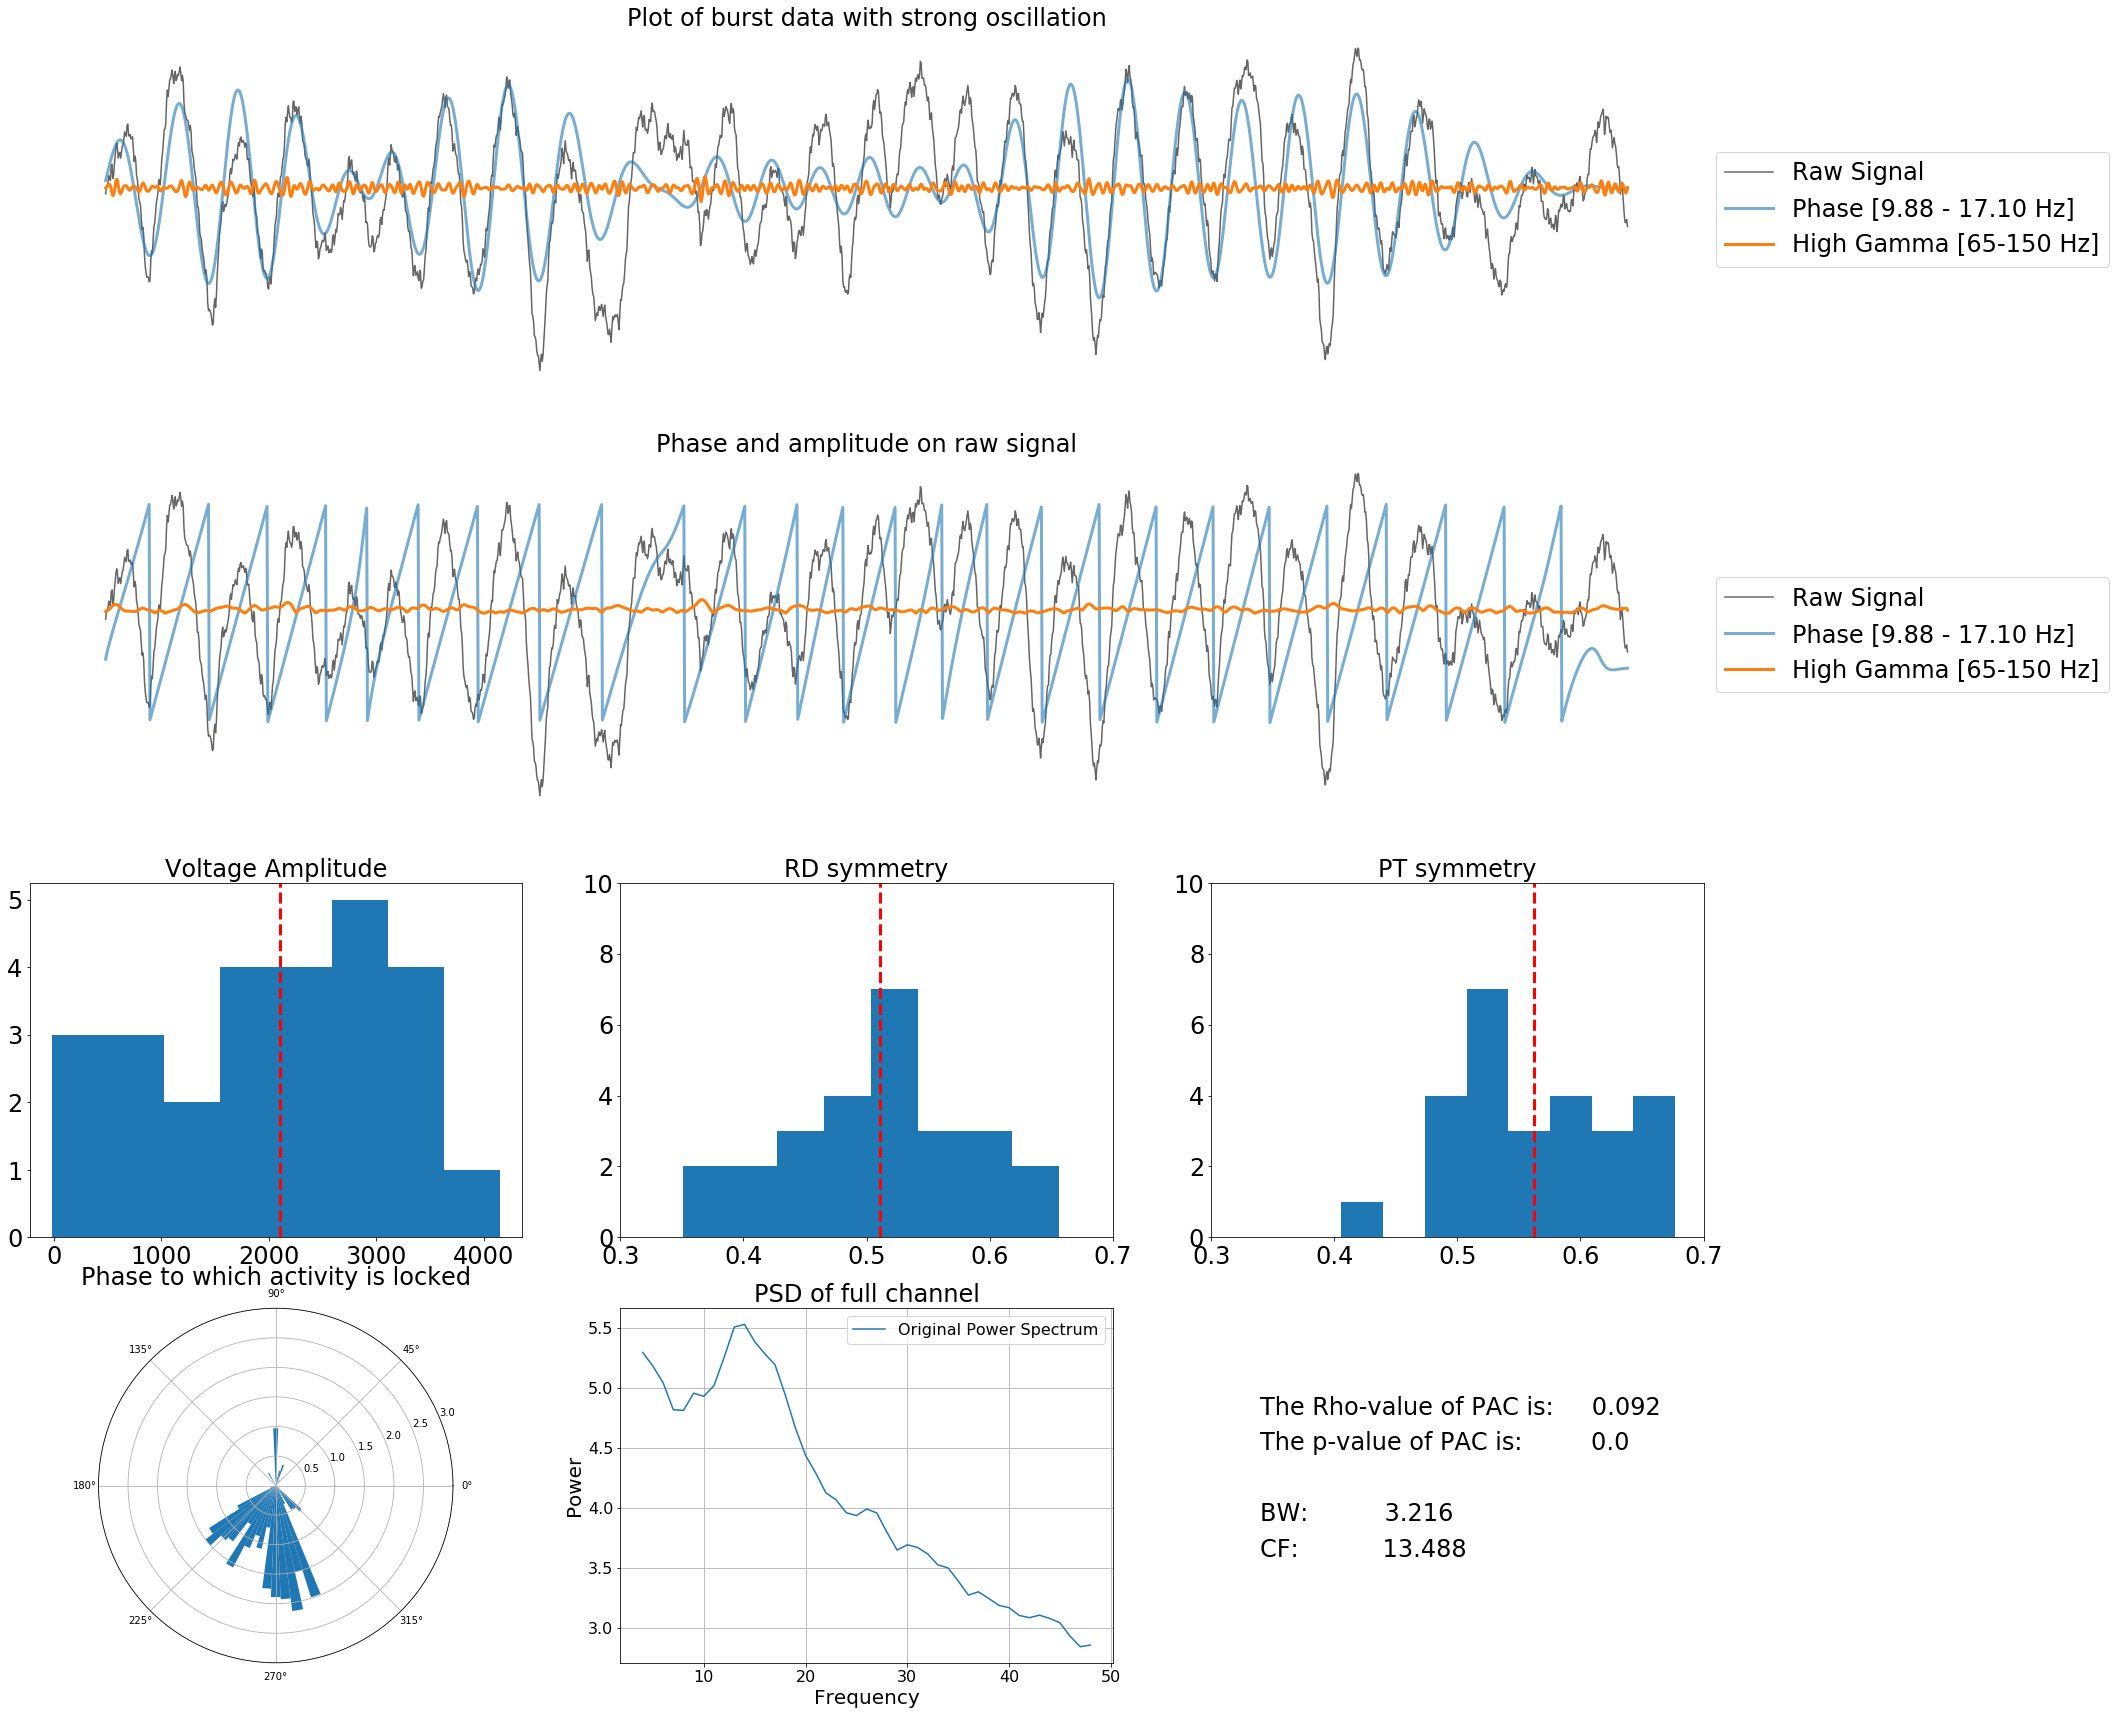

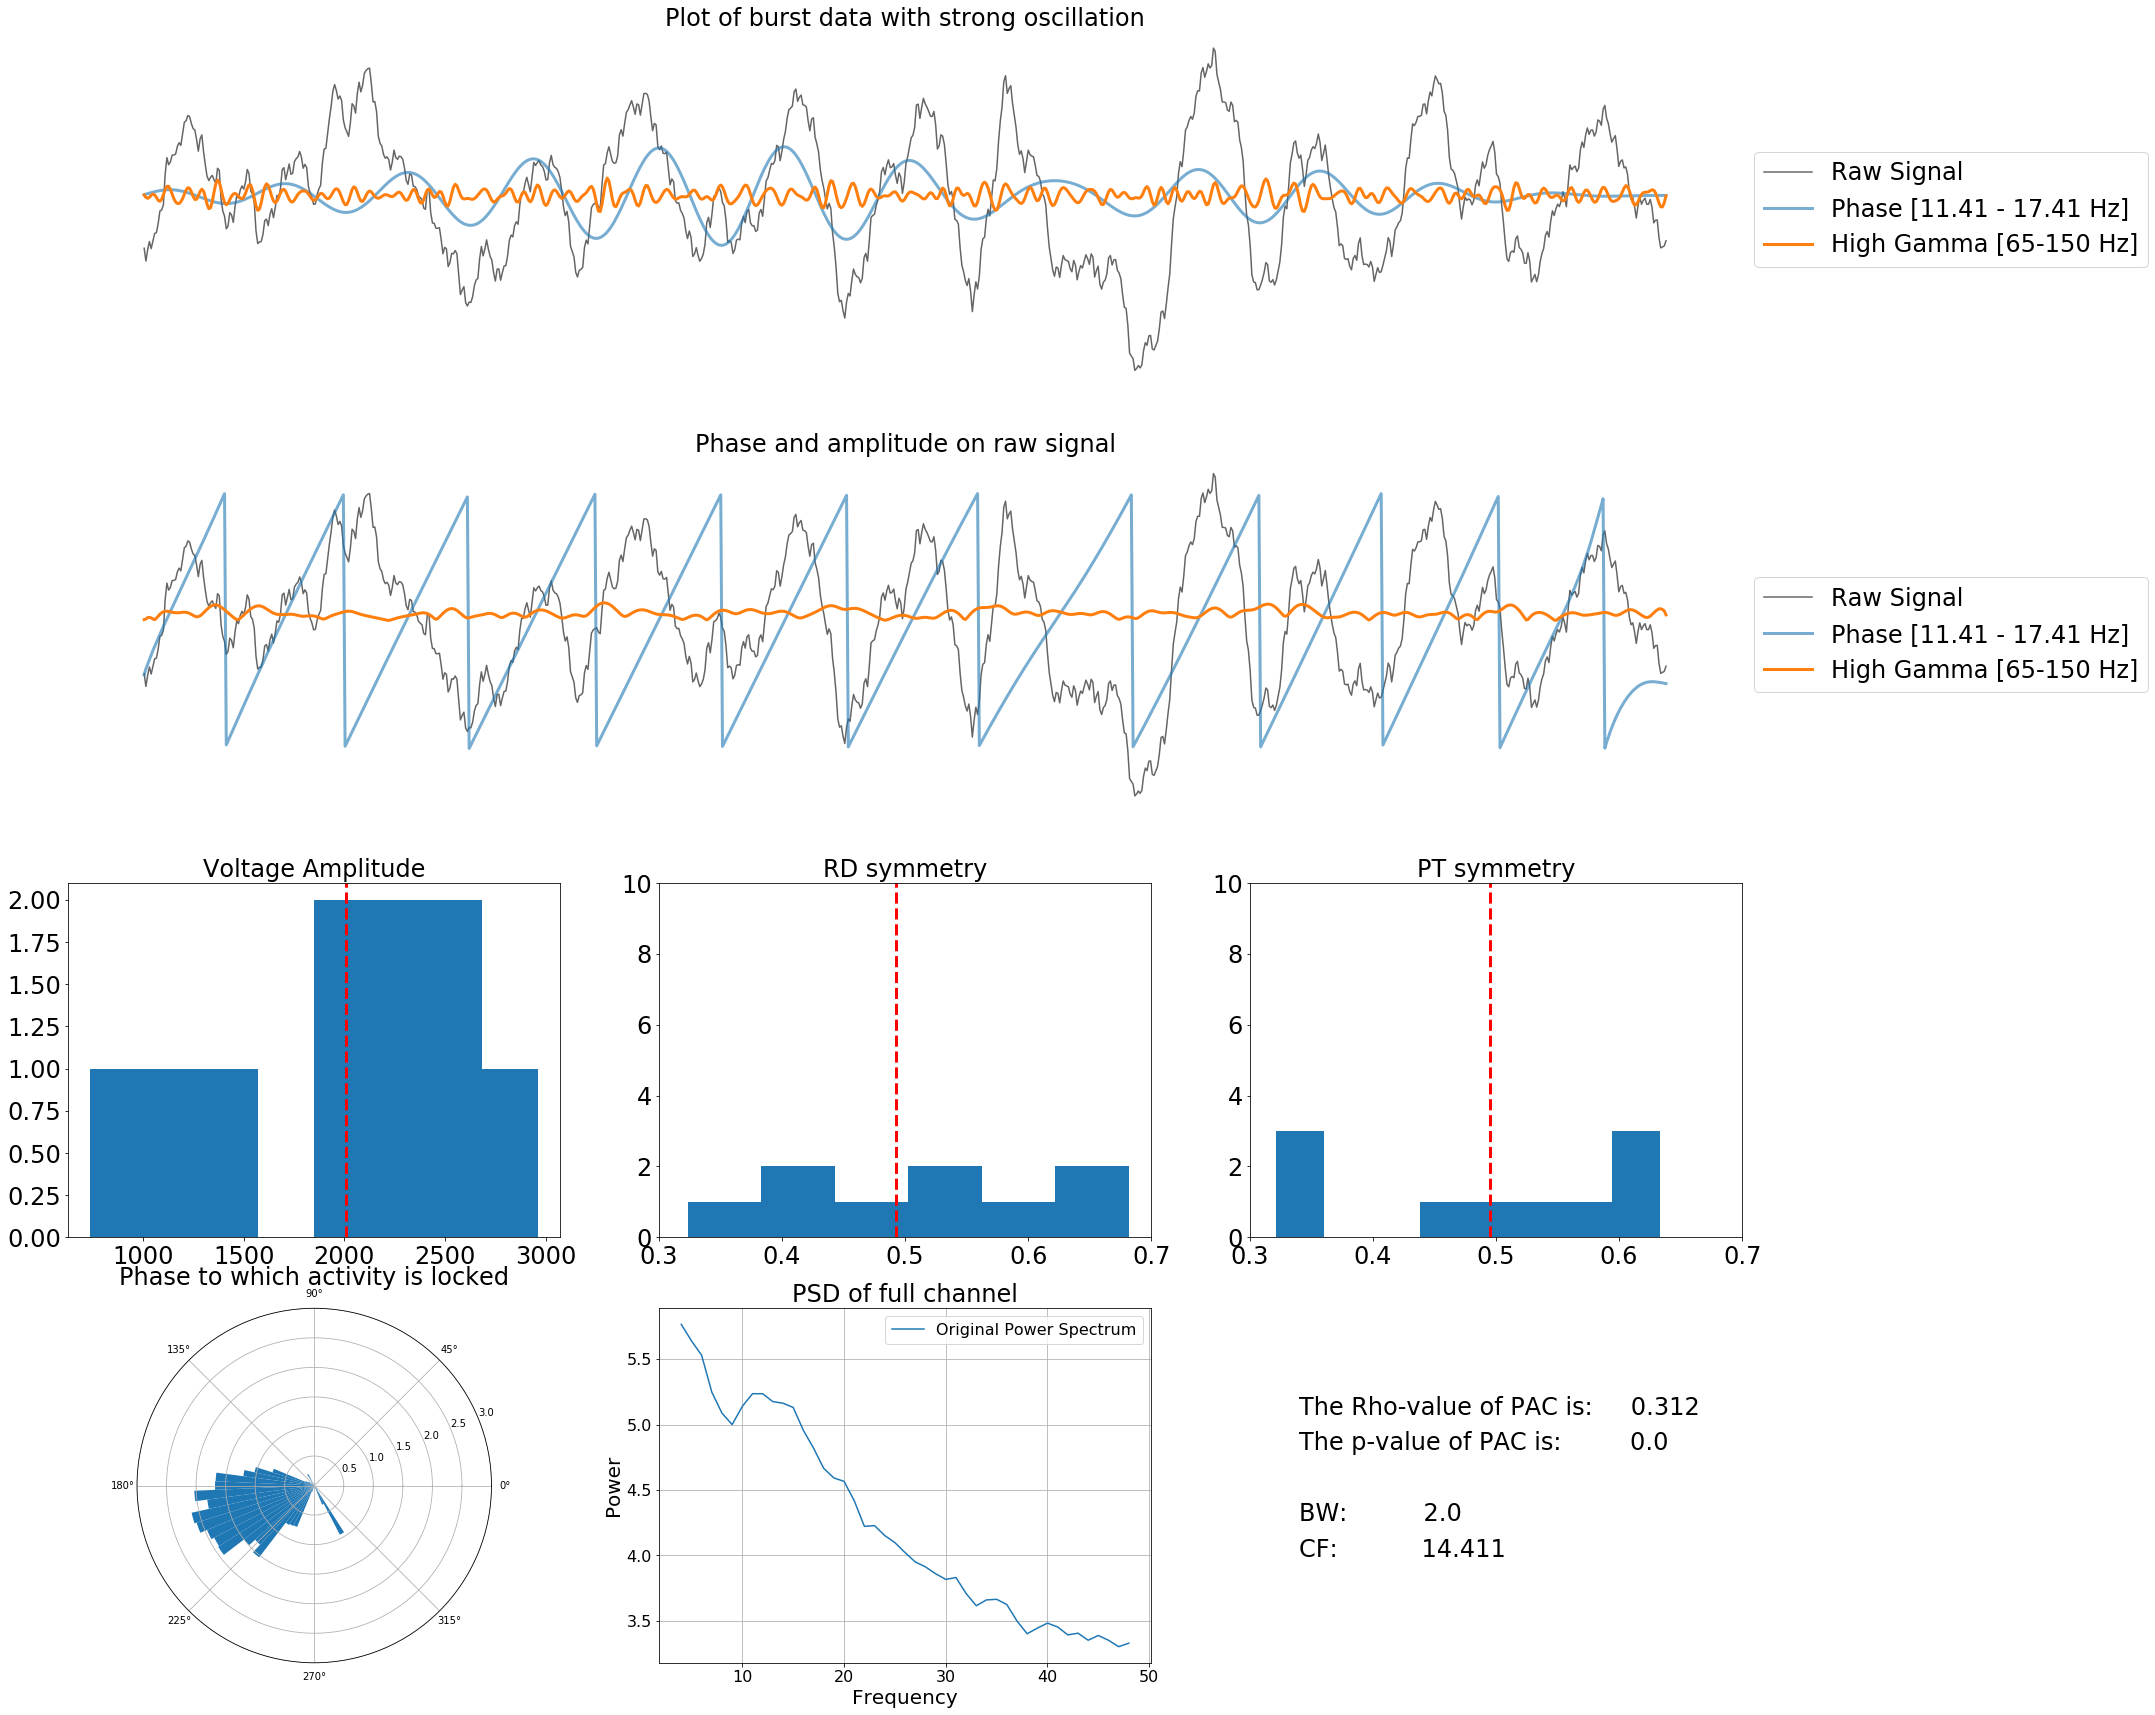

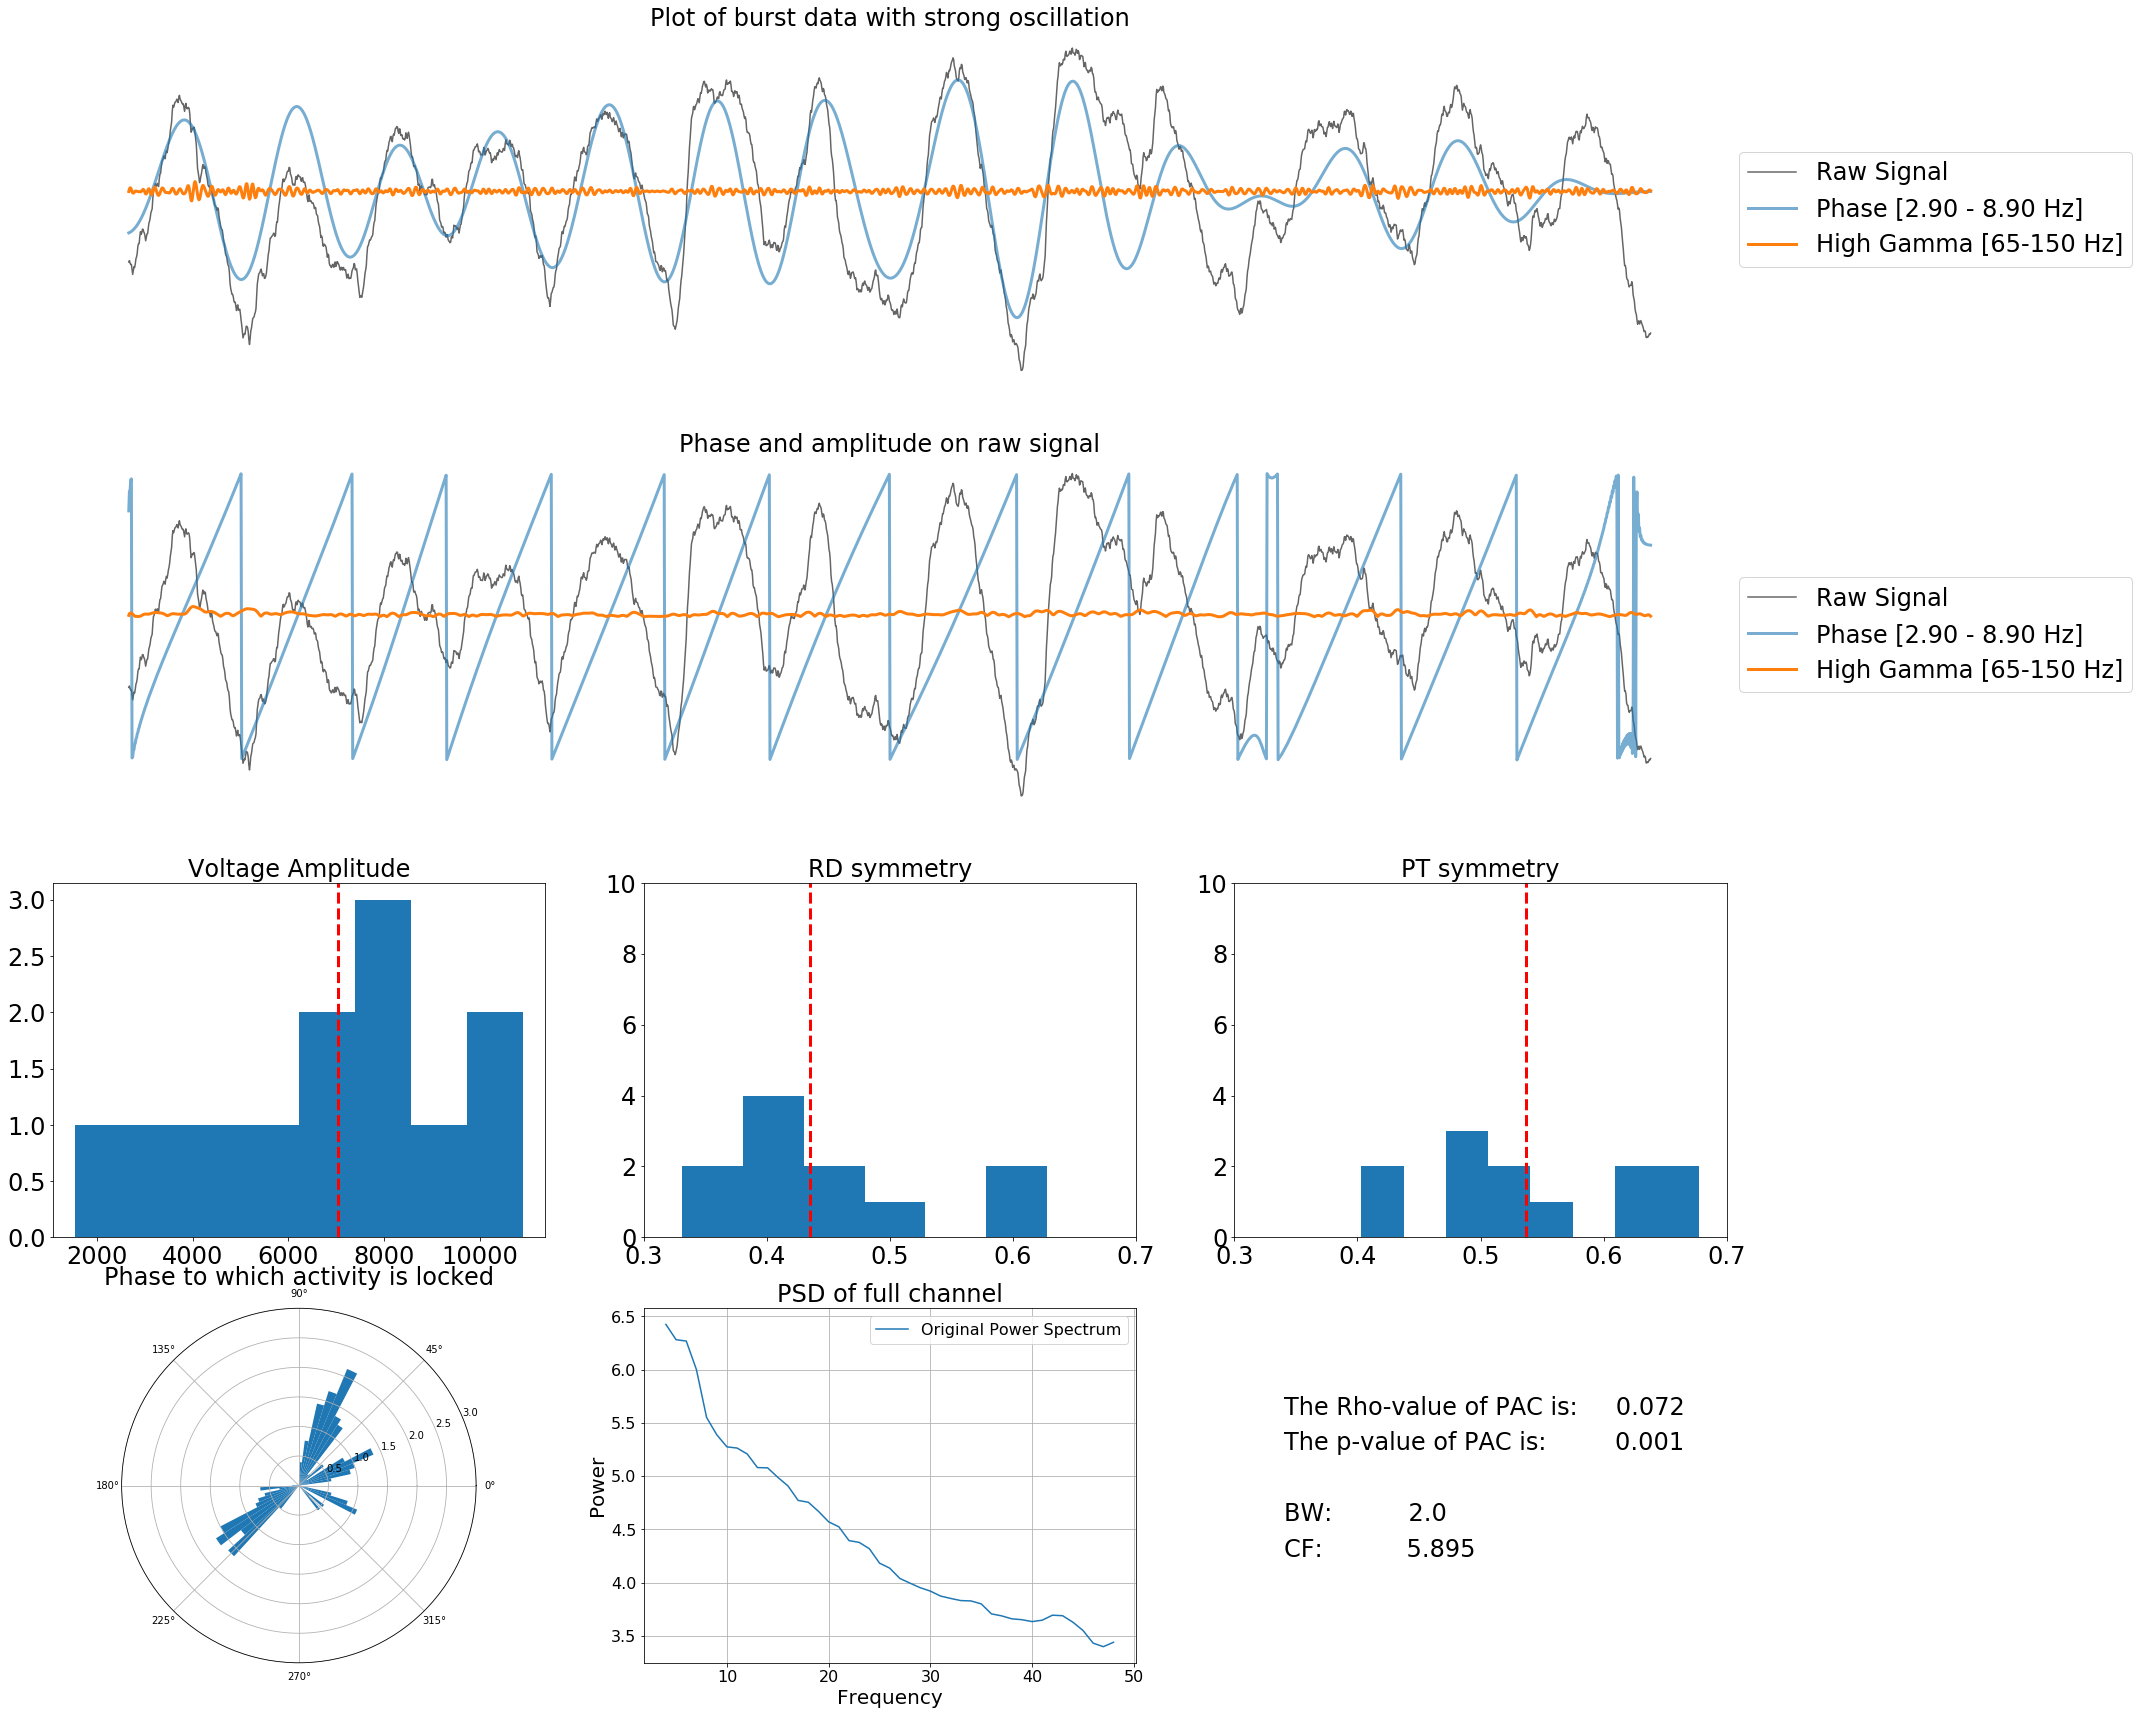

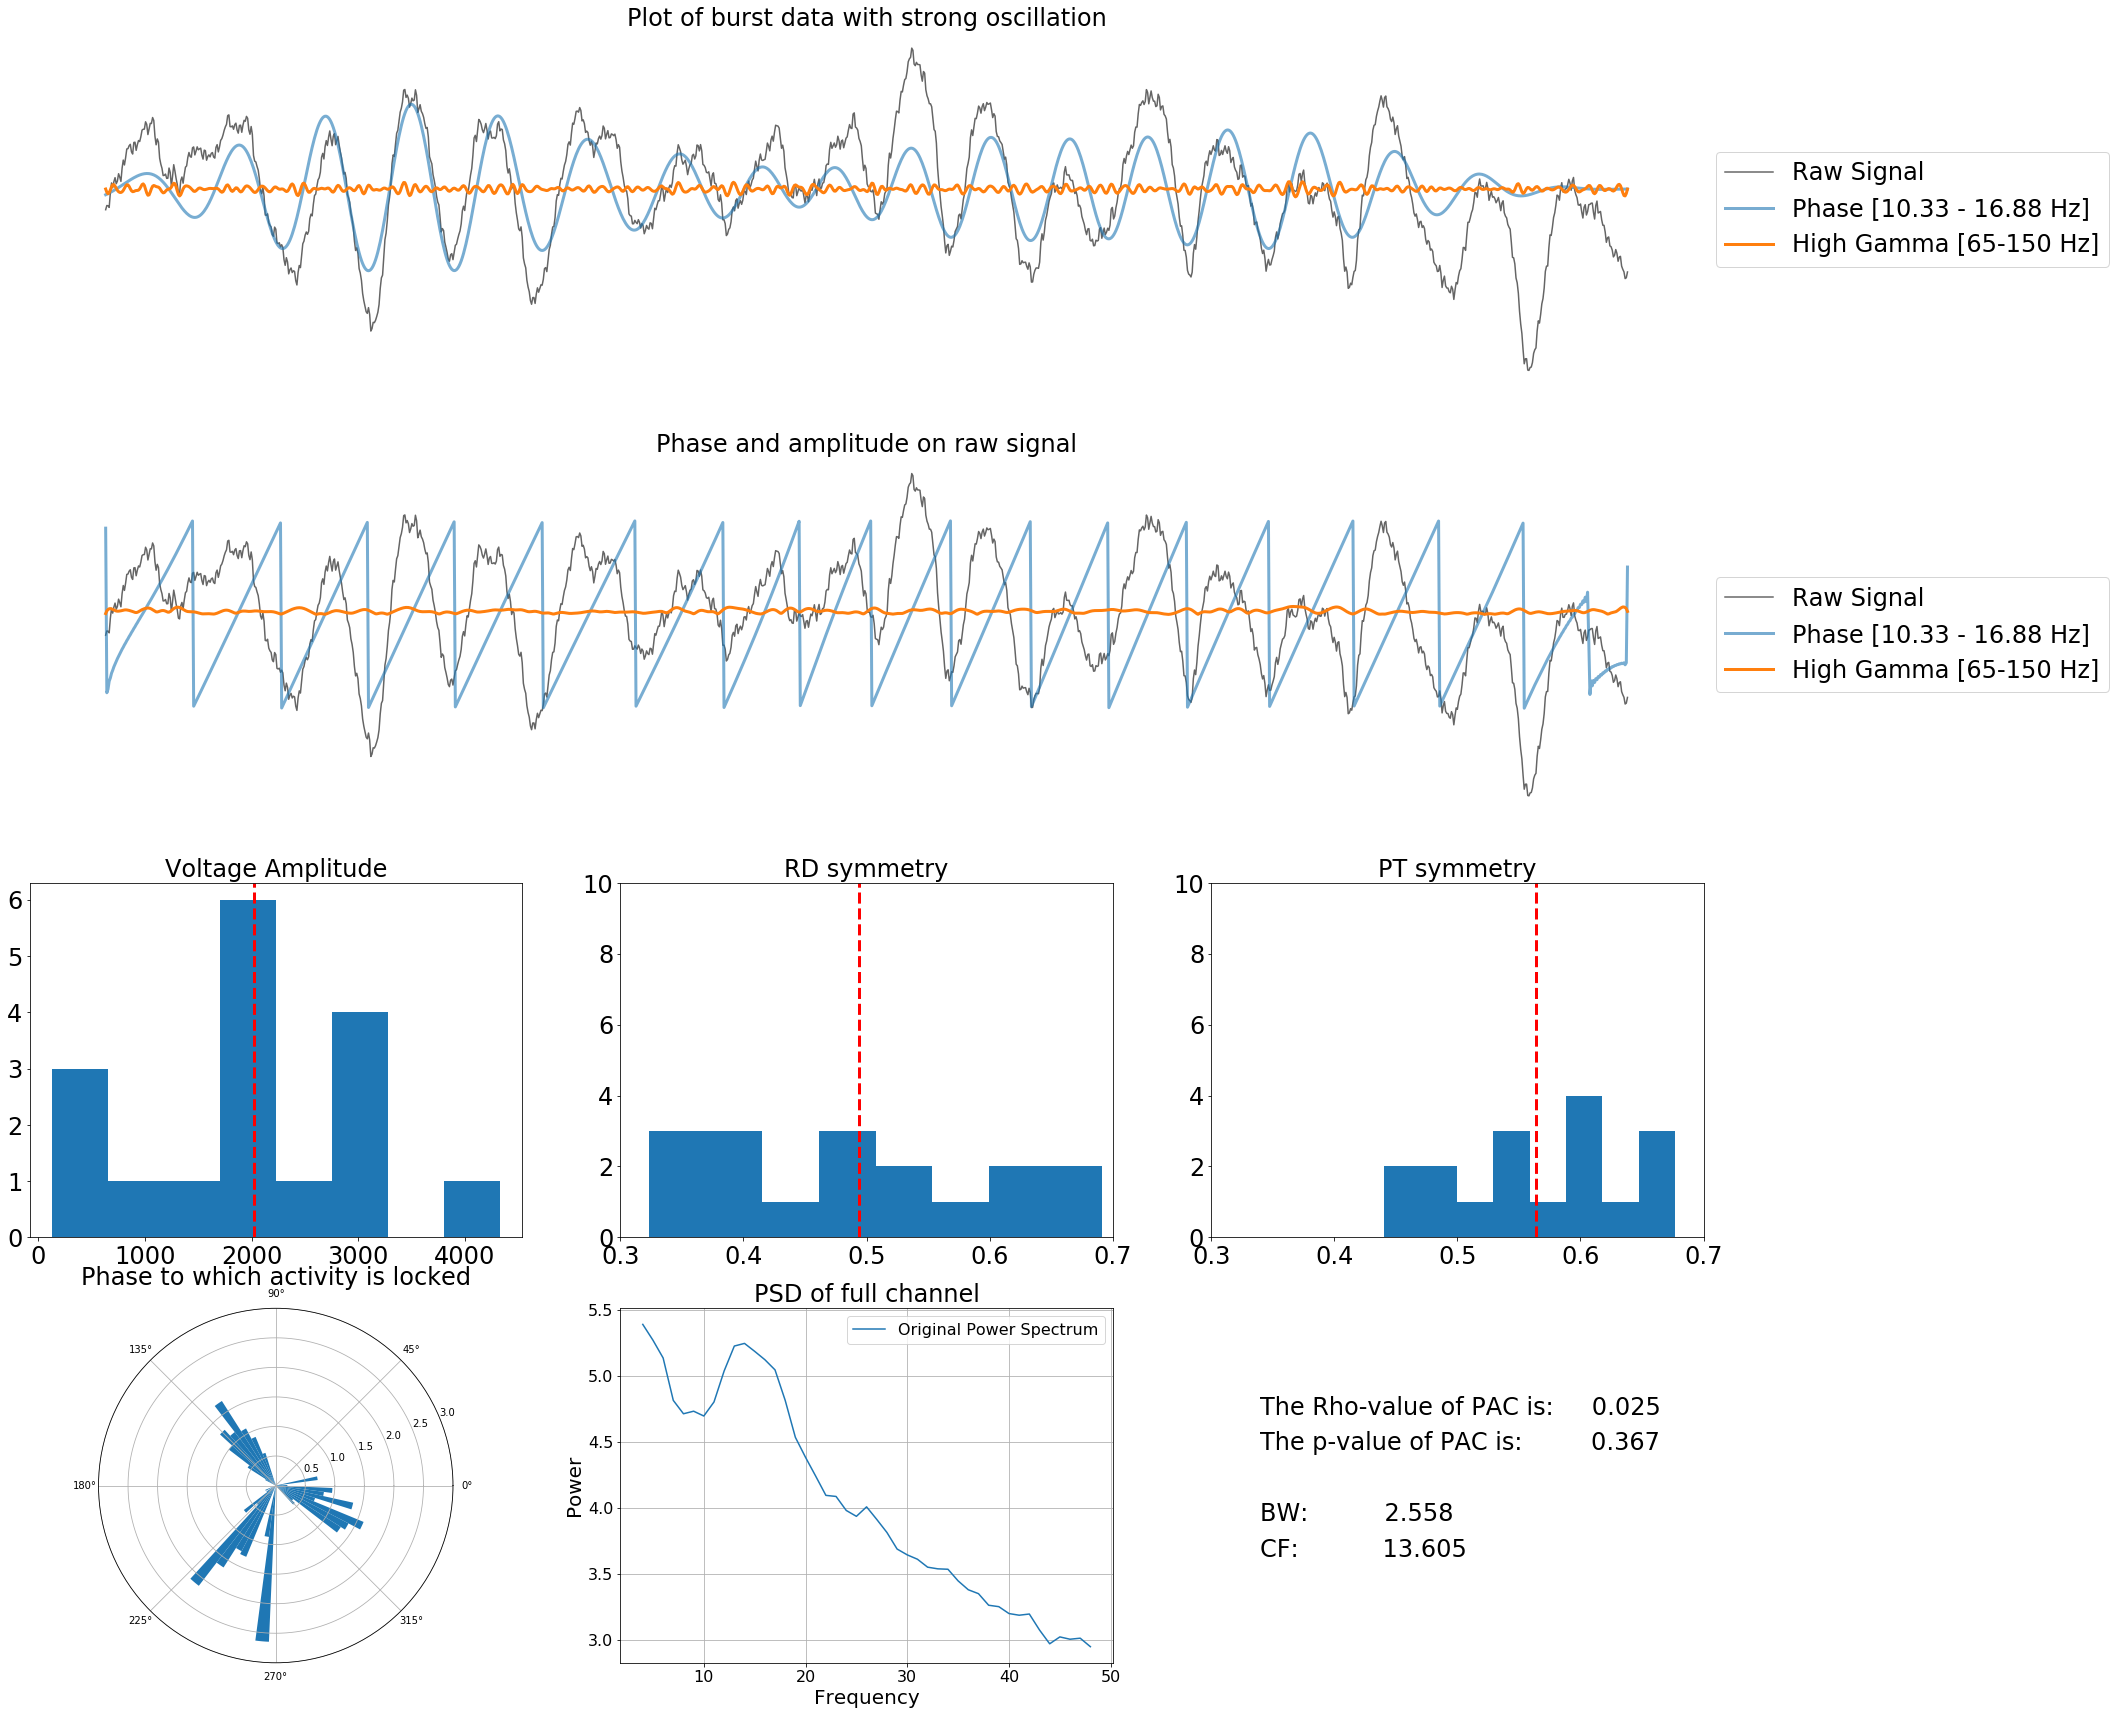

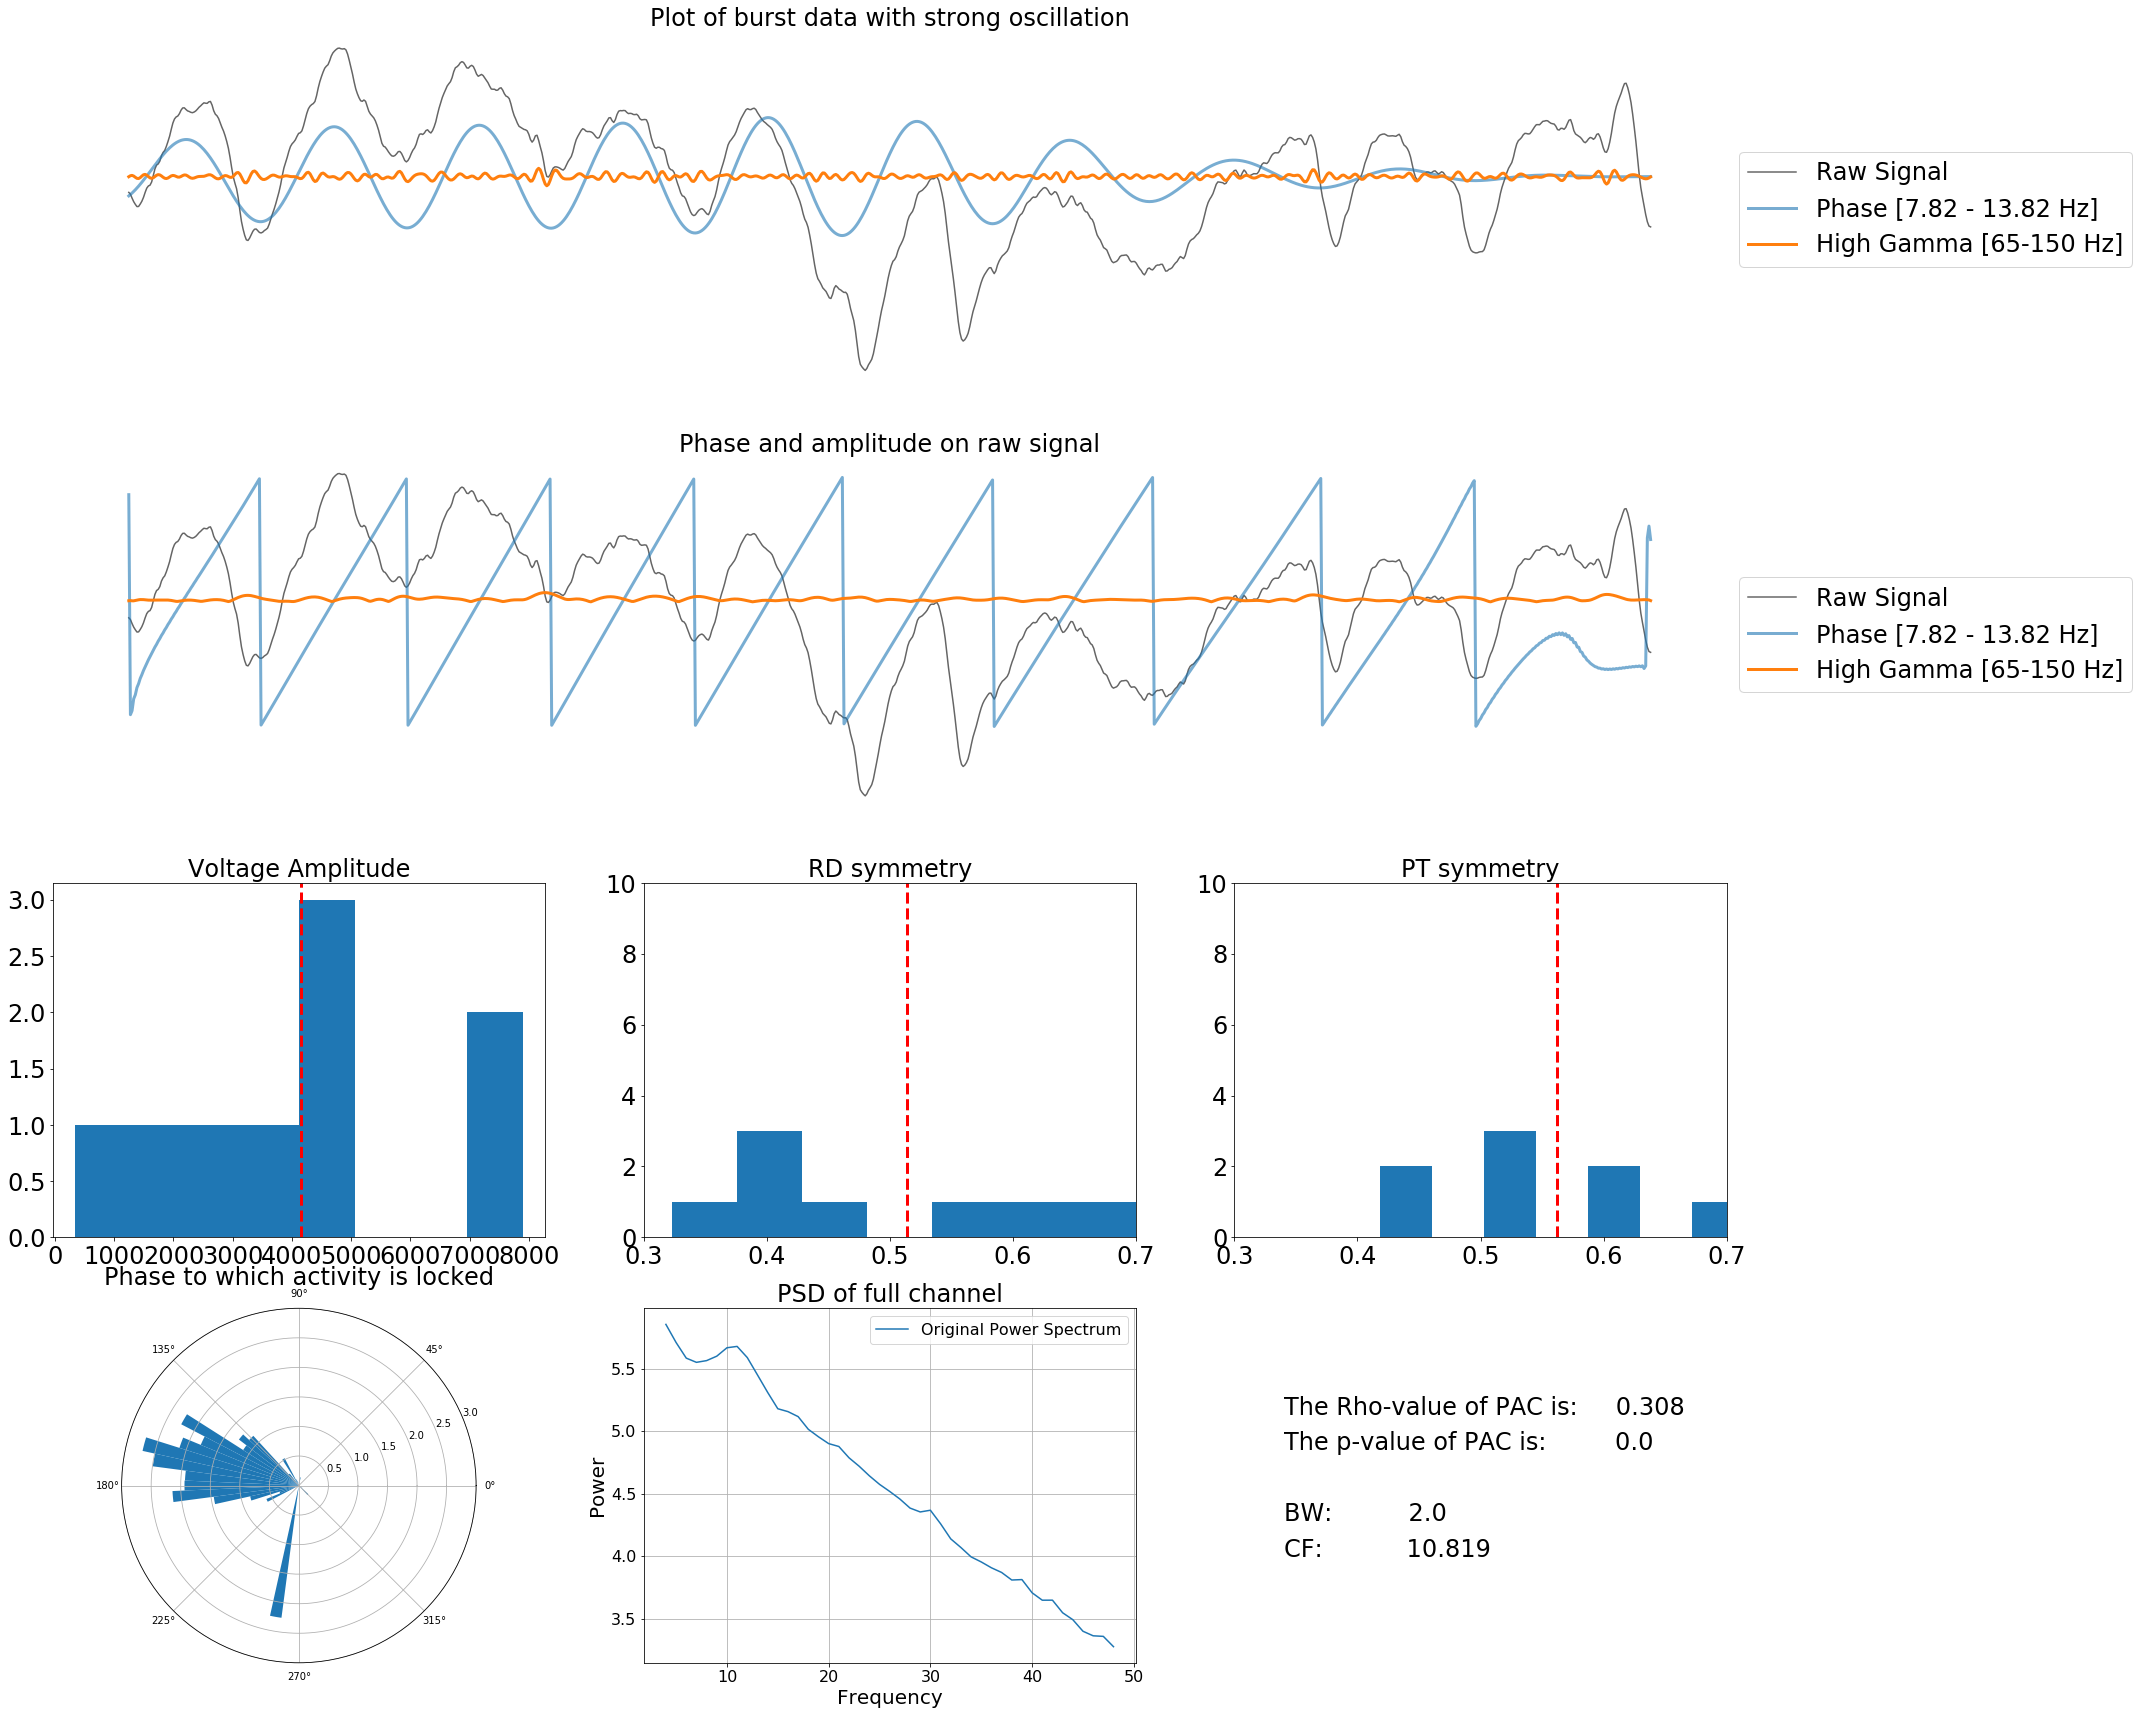

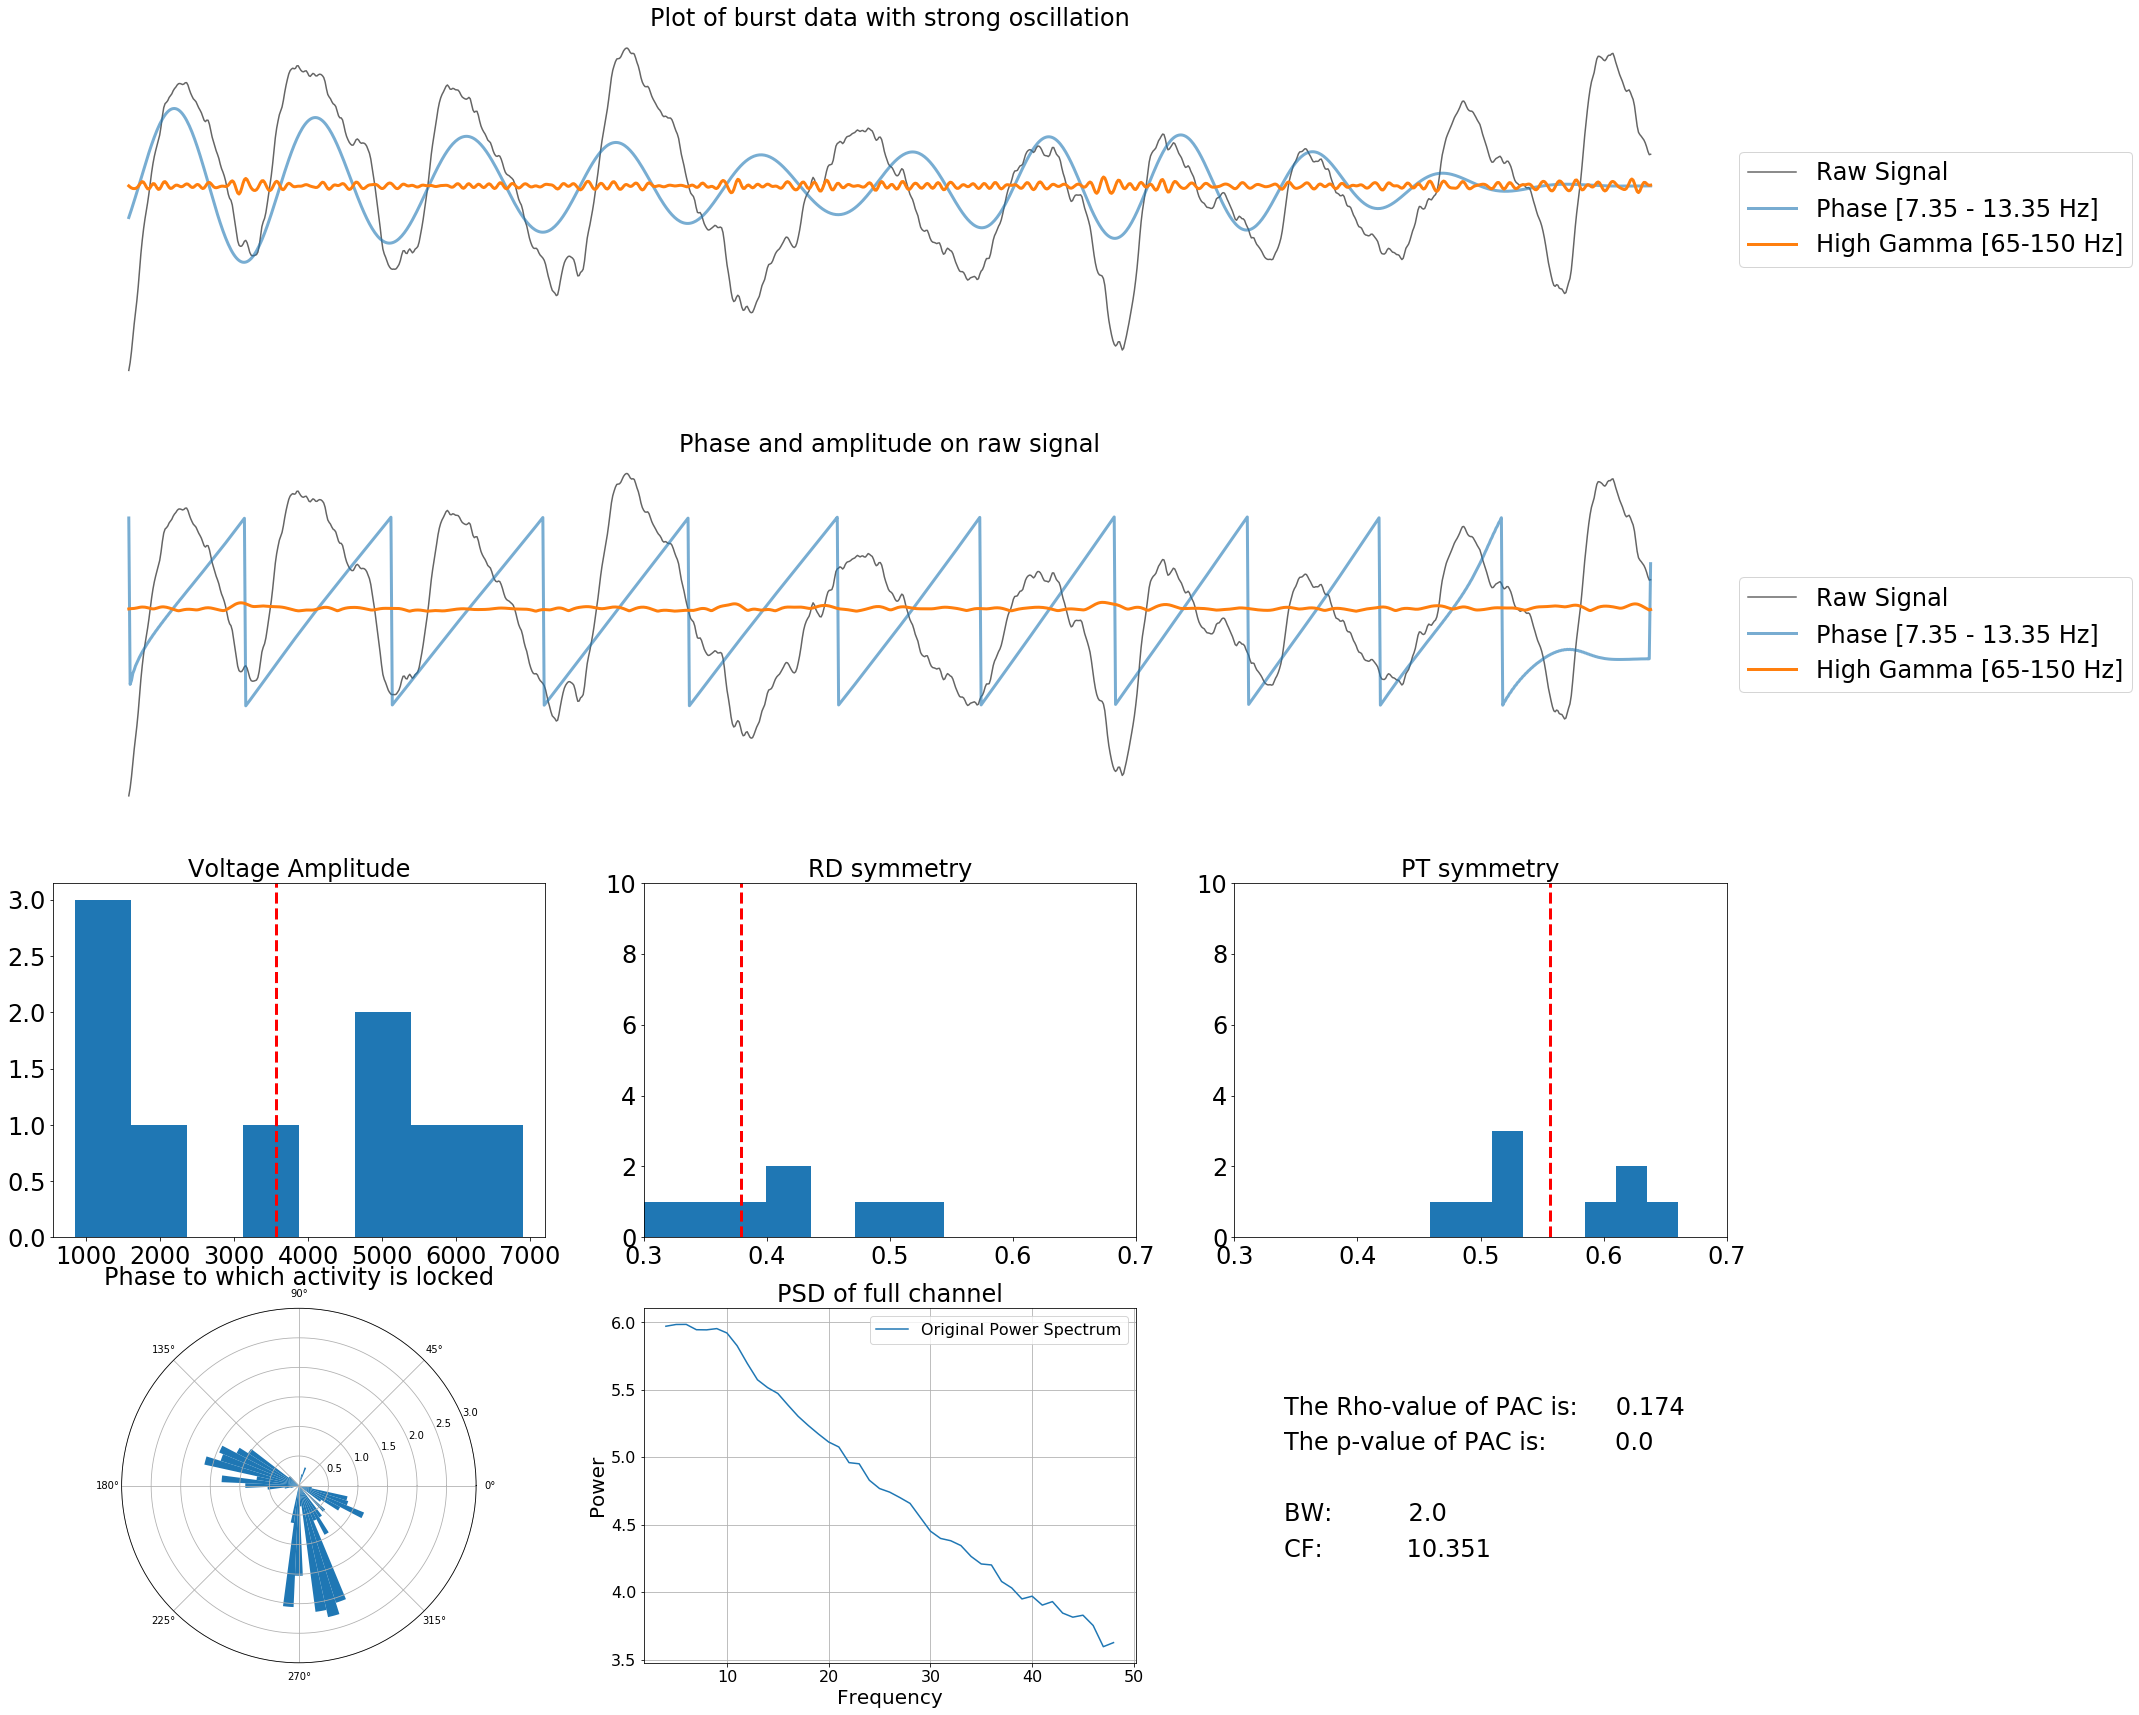

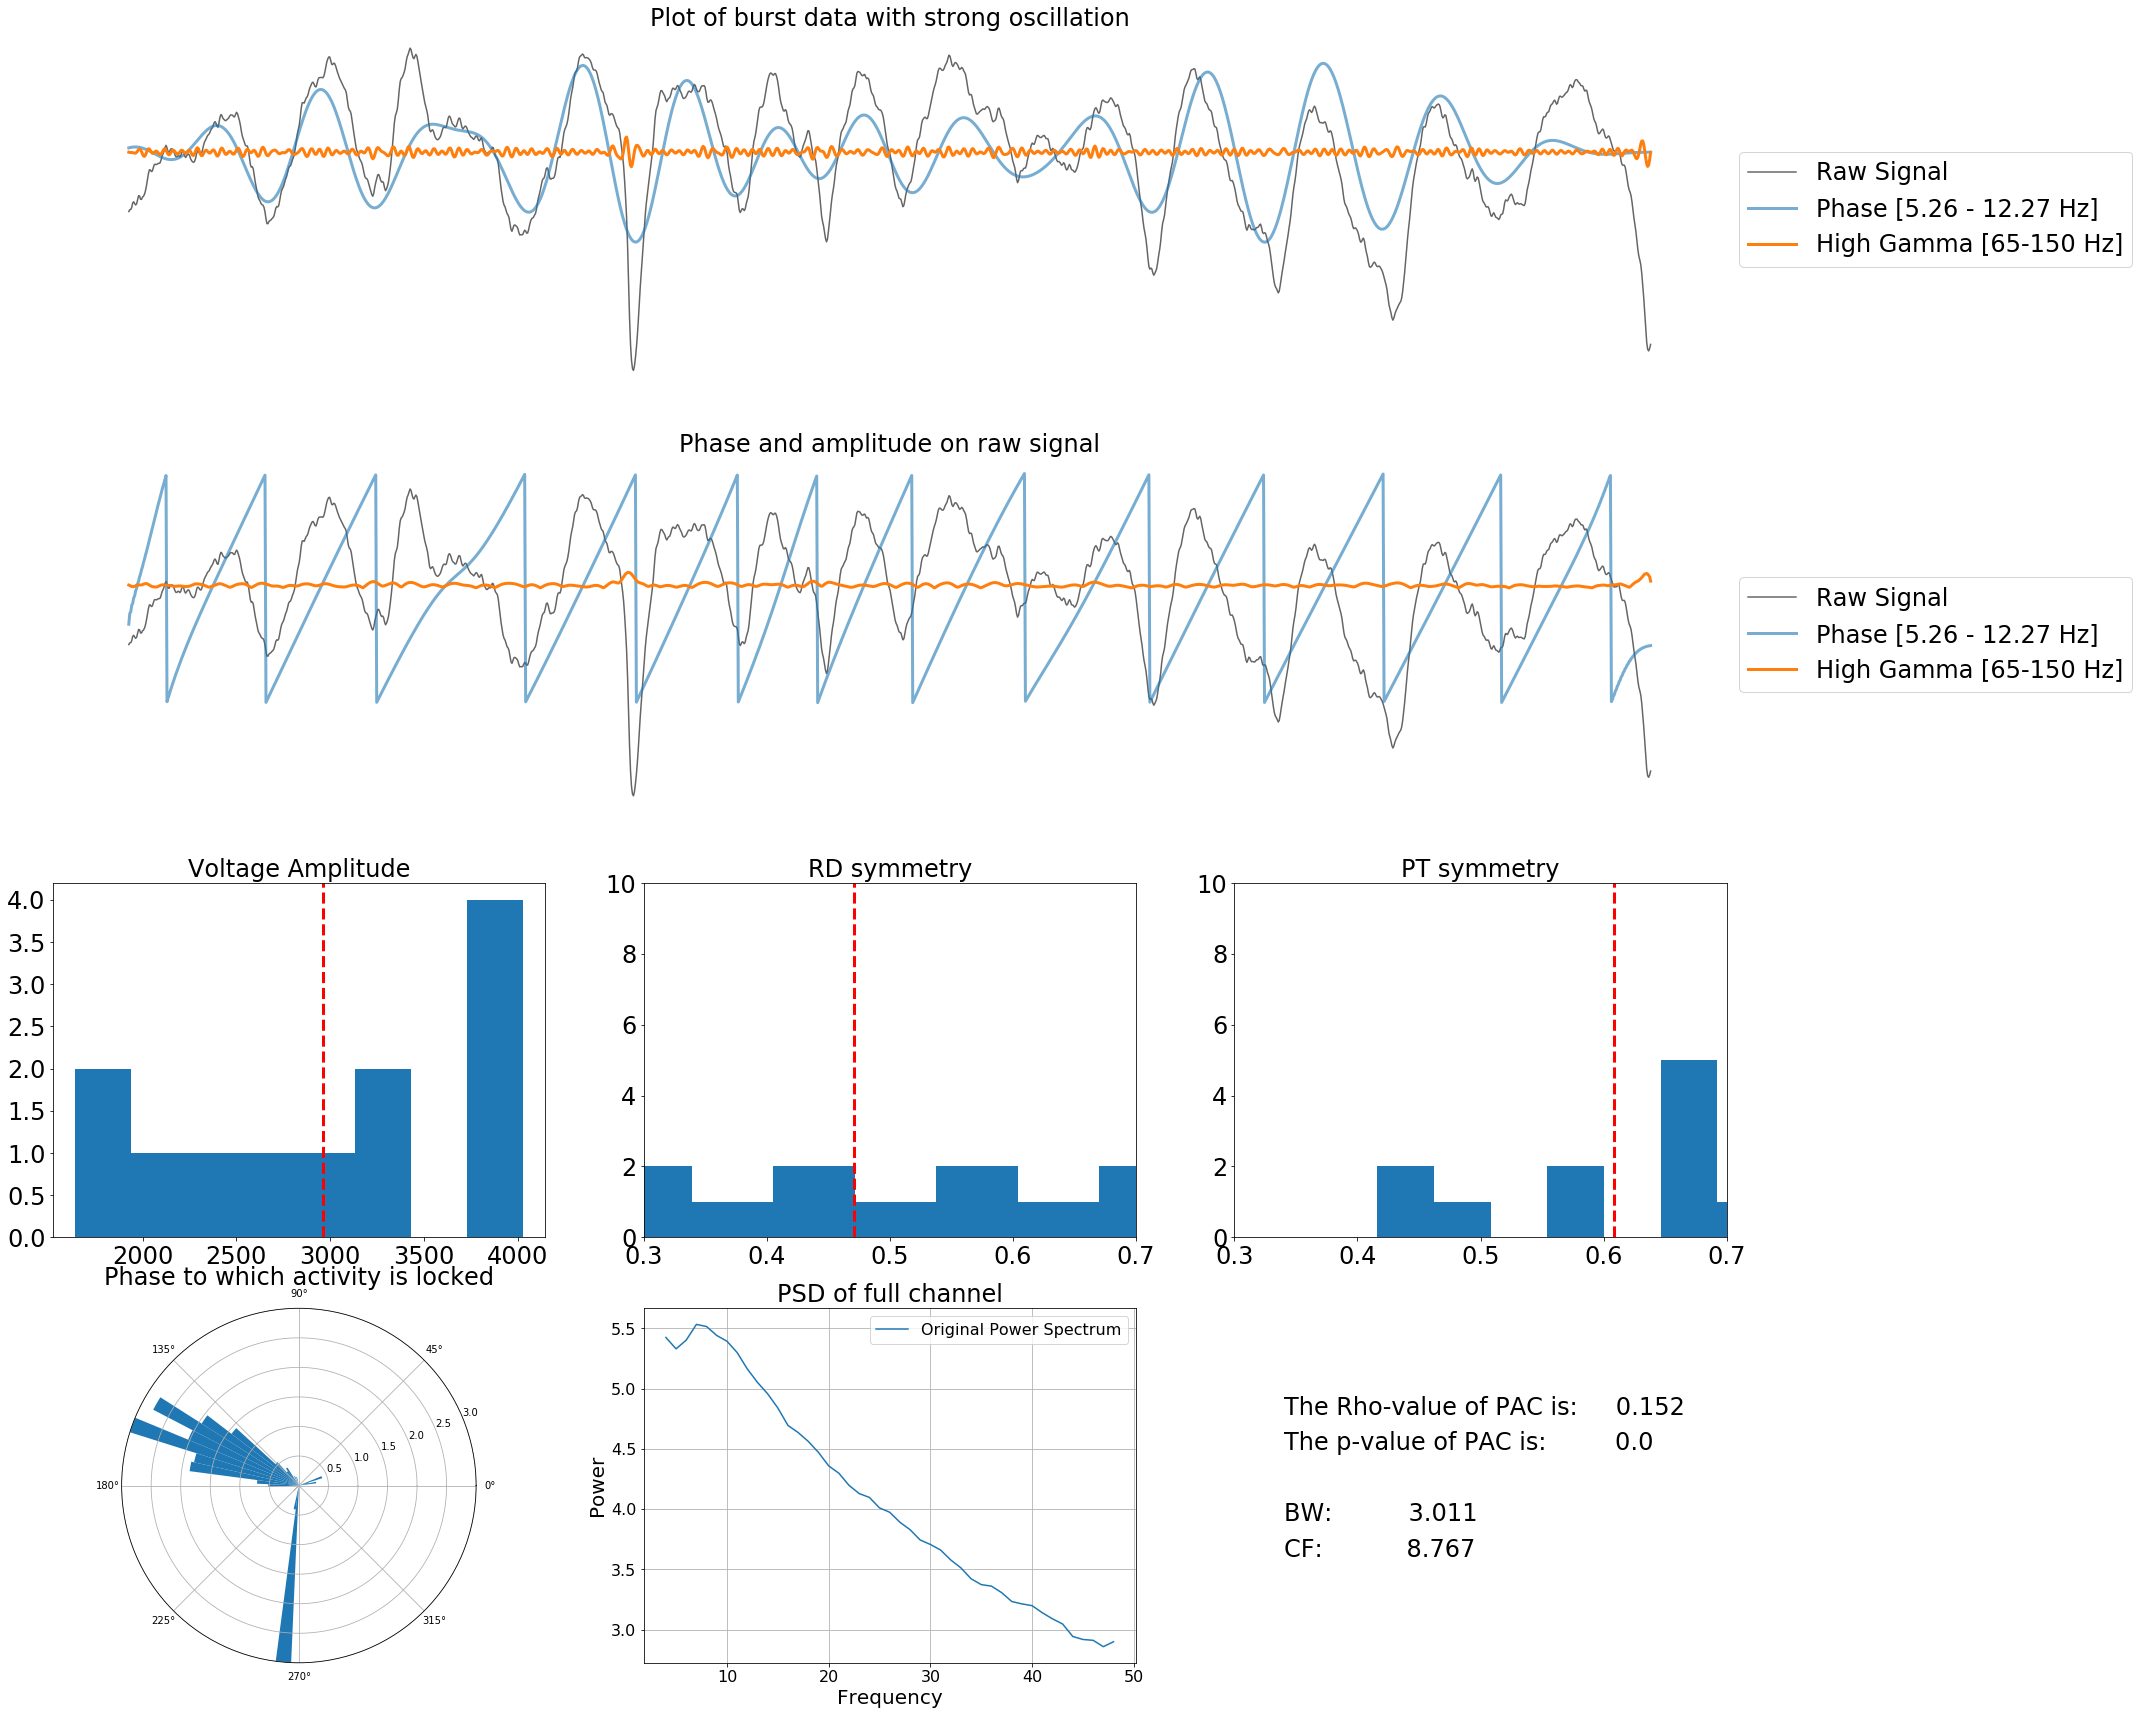

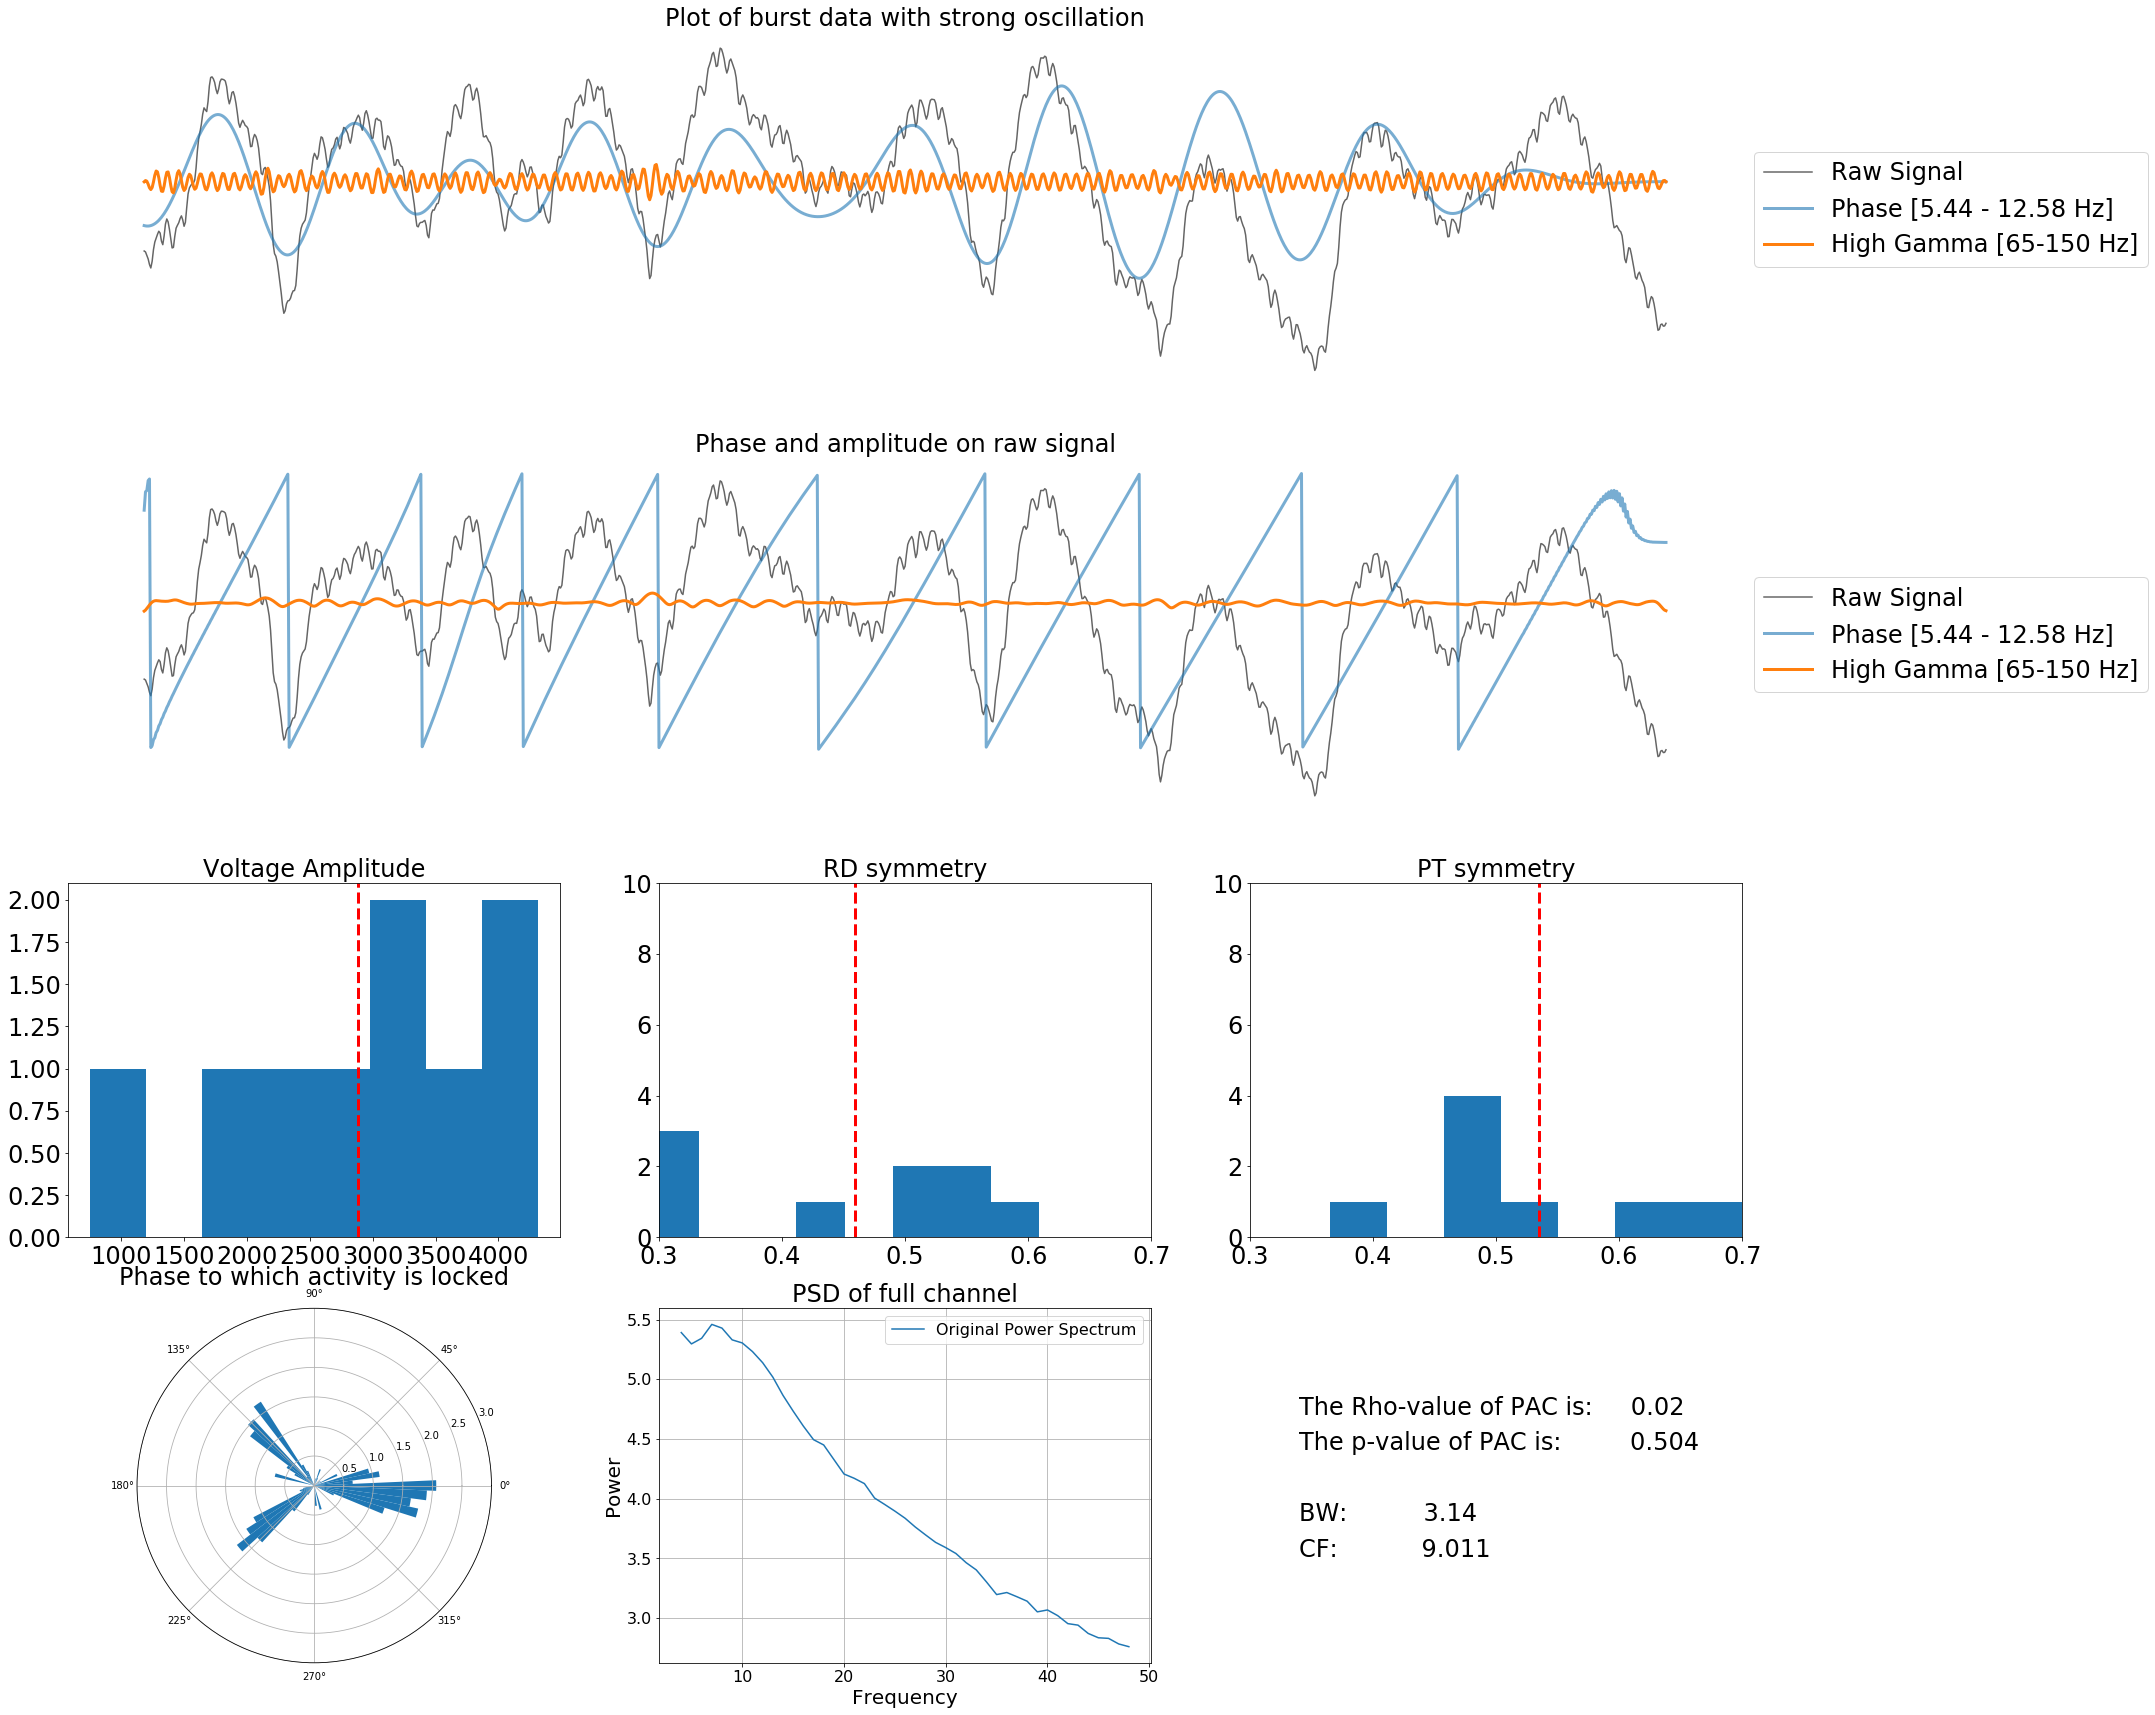

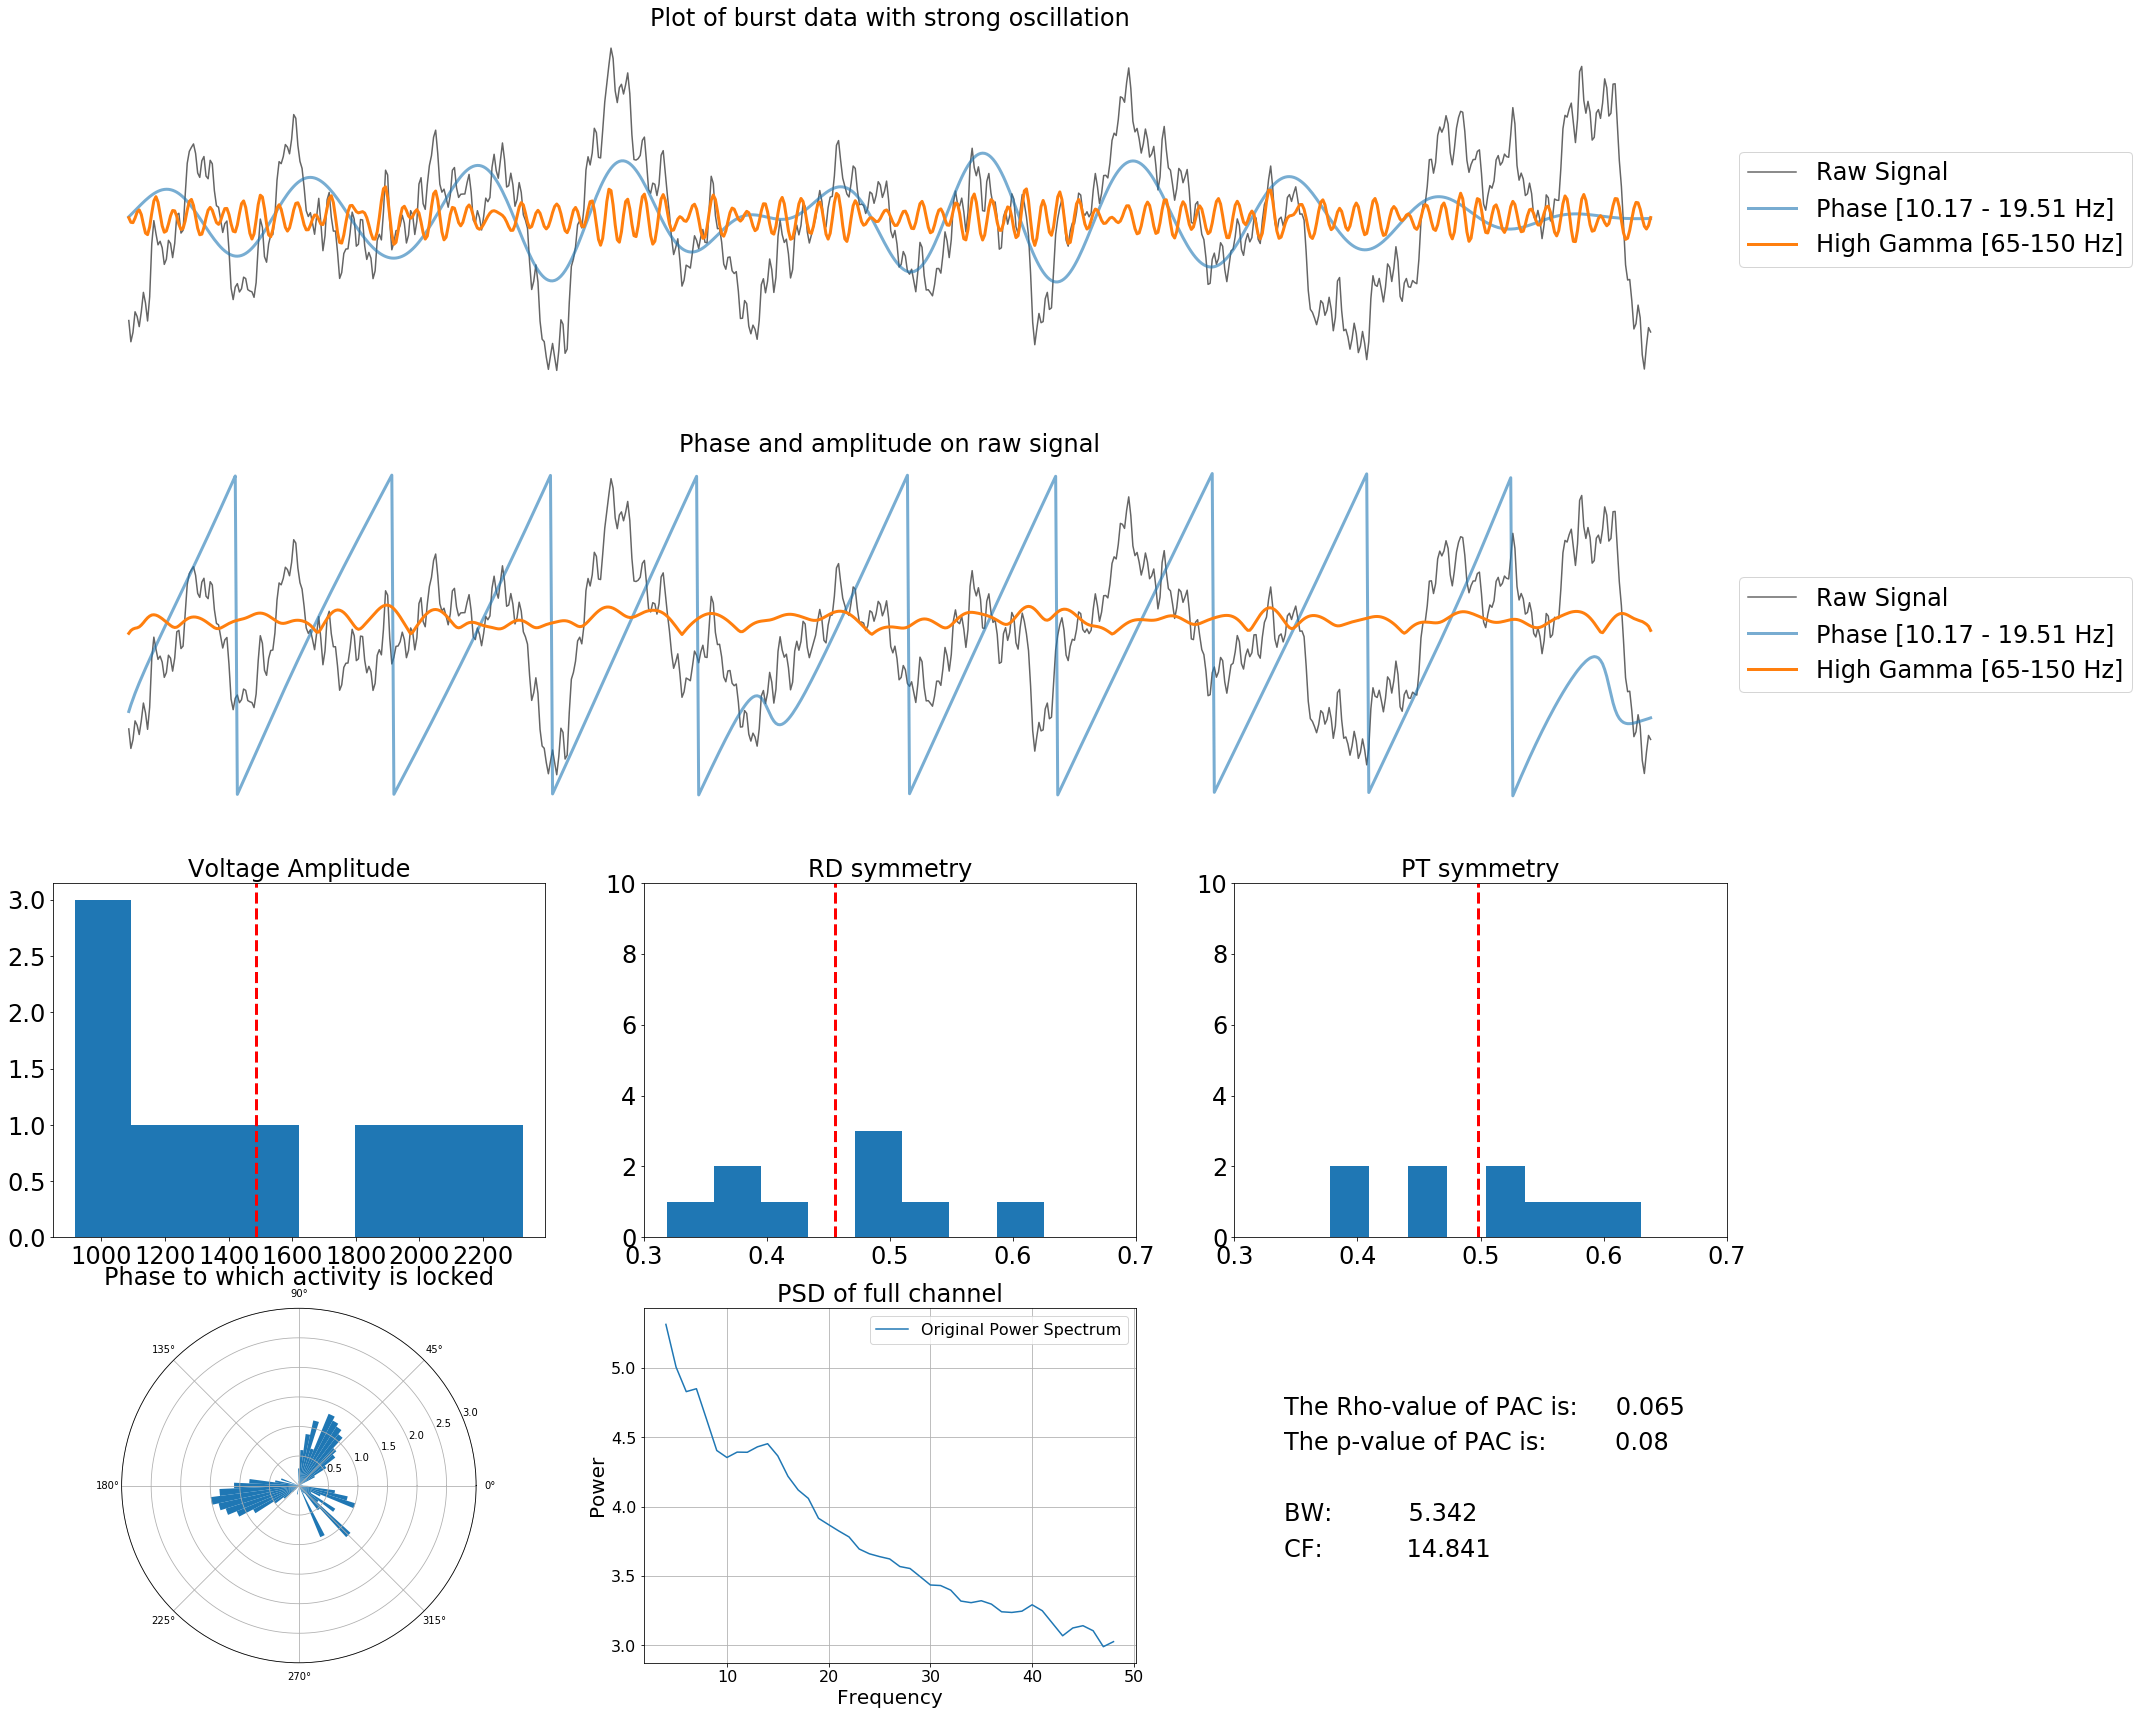

In [58]:
fs = 1000

freq_range = [4, 48] # for peak detection
bw_lims = [2, 6]
max_n_peaks = 5

# set range of the band 
amplitude_providing_band = [65, 150]

for ii in range(0,100):
    
    if burst_list[ii] is not None:
        
        if burst_list[ii][2]:

            # define phase providing band
            CF = features_df['CF'][ii]
            BW = features_df['BW'][ii]

            # making the phase bands 2 bigger on each side works better,
            # so have to check whether FOOOF functions properly

            # phase_providing_band= [(CF - (BW/2)),  (CF + (BW/2))]
            phase_providing_band= [(CF - (BW/2))-1,  (CF + (BW/2))+1]
            # phase_providing_band = [1, 30]

            subj = features_df['subj'][ii]
            # day = features_df['day'][ii]
            ch = features_df['ch'][ii]
            #ep = features_df['ep'][ii]

            start_sample = burst_list[ii][0]
            end_sample = burst_list[ii][1]

            data = datastruct[subj][ch][start_sample:end_sample]
            # data = datastruct[subj][ch][ep][start_sample:end_sample]
            # data = datastruct[subj][day][ch][ep][start_sample:end_sample]

            # use butter bandpass filter to extract this frequency range
            phase_data = pacf.butter_bandpass_filter(data, phase_providing_band[0], phase_providing_band[1], fs);
            phase_data_hilbert = hilbert(phase_data);
            phase_data_angle = np.angle(phase_data_hilbert);
            
            # use butter bandpass filter to extract this frequency range
            amp_data = pacf.butter_bandpass_filter(data, amplitude_providing_band[0], amplitude_providing_band[1], fs);
            amp_data_hilbert = hilbert(amp_data);
            amp_data_abs = abs(amp_data_hilbert);
            

            # plot signal
            # plt.figure(figsize=(30,30))
            fig = plt.figure(figsize=(30,30))
            gs = fig.add_gridspec(4, 3)
            
            # ax1: signal plot
            f_ax1 = fig.add_subplot(gs[0, :])
            plt.plot(data - np.mean(data),label= 'Raw Signal', color='black', alpha=.6)
            plt.plot(phase_data,
                     label= 'Phase [{0:.2f} - {1:.2f} Hz]'.format(phase_providing_band[0]-1, phase_providing_band[1]+1),
                     linewidth=3, alpha=.6)
            plt.plot(amp_data,label= 'High Gamma [65-150 Hz]',
                     linewidth=3)
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=24)
            plt.title('Plot of burst data with strong oscillation', size=24)
            plt.axis('off')
            
            # ax2: phase and amplitude plot
            f_ax2 = fig.add_subplot(gs[1, :])
            plt.plot(data - np.mean(data),label= 'Raw Signal', color='black', alpha=.6)
            plt.plot((phase_data_angle*np.mean(burst_list[ii][2])/2),
                     label= 'Phase [{0:.2f} - {1:.2f} Hz]'.format(phase_providing_band[0]-1, phase_providing_band[1]+1),
                     linewidth=3, alpha=.6)
            plt.plot(amp_data_abs,label= 'High Gamma [65-150 Hz]',
                     linewidth=3)
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=24)
            plt.title('Phase and amplitude on raw signal', size=24)
            plt.axis('off')
            
            # ax3: Amplitude distribution
            f_ax3 = fig.add_subplot(gs[2,0])
            plt.hist(burst_list[ii][2], bins=8)
            plt.axvline(np.mean(burst_list[ii][2]), color='red', linestyle='dashed', linewidth=3)
            plt.title('Voltage Amplitude', size=24)
            plt.xticks(fontsize=24)
            plt.yticks(fontsize=24)

           
            # ax4: RD Symmetry
            f_ax4 = fig.add_subplot(gs[2,1])
            plt.hist(burst_list[ii][3],bins=8)
            plt.axvline(np.mean(burst_list[ii][3]), color='red', linestyle='dashed', linewidth=3)
            plt.title('RD symmetry', size=24)
            plt.xticks(np.arange(0.3, 0.8, step=0.1), fontsize=24)
            plt.yticks(fontsize=24)
            plt.xlim((0.3,0.7))
            plt.ylim(0,10)
            
            
            # ax5: PT Symmetry
            f_ax5 = fig.add_subplot(gs[2,2])
            plt.hist(burst_list[ii][4], bins=8)
            plt.axvline(np.mean(burst_list[ii][4]), color='red', linestyle='dashed', linewidth=3)
            plt.title('PT symmetry', size=24)
            plt.xticks(np.arange(0.3, 0.8, step=0.1), fontsize=24)
            plt.yticks(fontsize=24)
            plt.xlim((0.3,0.7))
            plt.ylim(0,10)
            #plt.show()
            
            
            # preprocessing circle plot
            bin_size = 5; 
            bins = range(-180,180+bin_size,bin_size); 
            bins = np.dot(bins, 0.0174532925);

            amps = [];

            #filling phase bins with amplitudes
            for x in range(len(bins)-1):
                # find the lower bound of the bin
                amps_above_lo_bound = np.where(phase_data_angle >= bins[x])[0];
                # find the higher bound of the bin
                amps_below_hi_bound = np.where(phase_data_angle < bins[x+1])[0];
                amps_below_hi_bound = set(amps_below_hi_bound);
                # select all samples that are within the range
                amp_inds_in_this_bin = [amp_val for amp_val in amps_above_lo_bound if amp_val in amps_below_hi_bound]
                # find corresponding amplitudes for these samples
                amps_in_this_bin = amp_data_abs[amp_inds_in_this_bin];
                # calculate mean
                amps.append(np.mean(amps_in_this_bin));

            bins = bins[:len(bins)-1];

            #normalizing to make the effect more clear
            amps = (amps-np.mean(amps))/np.std(amps);

            
            # ax6: Circle correlation
            f_ax6 = fig.add_subplot(gs[3,0], projection='polar')
            plt.bar(bins, amps, width=bins[1]-bins[0], bottom=0.0)
            plt.ylim([0,3])
            plt.title('Phase to which activity is locked', size=24);
            

            #calculate circle correlation
            rho, pval, r_2, standard_error = pacf.circle_corr(phase_data_angle, amp_data_abs)
            
            # use full data for PSD
            #data = datastruct[subj][day][ch][ep]
            #data = datastruct[subj][ch][ep]
            data = datastruct[subj][ch]
            
            # compute frequency spectrum
            freq_mean, psd_mean = spectral.compute_spectrum(data, fs, method='welch', avg_type='mean', nperseg=fs)
            # Initialize FOOOF model
            fm = FOOOF(peak_width_limits=bw_lims, background_mode='knee', max_n_peaks=max_n_peaks)
            # fit model
            fm.fit(freq_mean, psd_mean, freq_range) 

            # ax7: Circle correlation
            f_ax7 = fig.add_subplot(gs[3,1])
            plot_spectrum(fm.freqs, fm.power_spectrum, label='Original Power Spectrum', ax=f_ax7)
            plt.title('PSD of full channel', size=24)
            
            
            # ax8: Stats 
            f_ax8 = fig.add_subplot(gs[3,2])
            f_ax8.text(1,7, 'The Rho-value of PAC is:' + '     ' + str(round(rho,3)), fontsize=24)
            f_ax8.text(1,6, 'The p-value of PAC is:' + '         ' + str(round(pval,3)), fontsize=24)
            f_ax8.text(1,4, 'BW:          ' +  str(round(BW,3)), fontsize=24) 
            f_ax8.text(1,3, 'CF:           '  + str(round(CF,3)), fontsize=24) 
                       
            f_ax8.axis([0, 10, 0, 10])
        
            f_ax8.axis('off')
            plt.show()
